# Thera Bank - Credit Card Users Churn Prediction

## Description

### Background & Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

### Objective

- Explore and visualize the dataset.
- Build a classification model to predict if the customer is going to churn or not
- Optimize the model using appropriate techniques
- Generate a set of insights and recommendations that will help the bank

### Data Dictionary:

- CLIENTNUM: Client number. Unique identifier for the customer holding the account
- Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
- Customer_Age: Age in Years
- Gender: Gender of the account holder
- Dependent_count: Number of dependents
- Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
- Marital_Status: Marital Status of the account holder
- Income_Category: Annual Income Category of the account holder
- Card_Category: Type of Card
- Months_on_book: Period of relationship with the bank
- Total_Relationship_Count: Total no. of products held by the customer
- Months_Inactive_12_mon: No. of months inactive in the last 12 months
- Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
- Credit_Limit: Credit Limit on the Credit Card
- Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
- Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
- Total_Trans_Amt: Total Transaction Amount (Last 12 months)
- Total_Trans_Ct: Total Transaction Count (Last 12 months)
- Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
- Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
- Avg_Utilization_Ratio: Represents how much of the available credit the customer spent

### Assumptions
1. The decline in credit card users have happened recently, but there is no indication whether there were reasons such as changes in policy, products or even government regulations. All of these are potential factors for a decline. 
2. Customer care is an important indicator of continued customer relationship. This dataset only scarcely explores indicators of customer satisfaction. For example, a high number of unresolved complaints could be a good predictor of attrition. 
3. Certain demographic information, like Occupation, are missing. These features could have been useful for missing value imputation and for analysing outliers.

### Importing libraries

In [1]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# library to encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn import set_config

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

<IPython.core.display.Javascript object>

Necessary libraries have been imported

### Loading the dataset

In [2]:
thera = pd.read_csv("BankChurners.csv")

<IPython.core.display.Javascript object>

In [3]:
# checking number of rows and columns
thera.shape

(10127, 21)

<IPython.core.display.Javascript object>

The dataset presents 10,127 rows and 21 columns

### Data Overview

In [4]:
# make a copy of the original dataset to view data summary
df = thera.copy()

<IPython.core.display.Javascript object>

In [5]:
# view first 5 rows of data
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3     12691.000                  777        11914.000   
1                      2      8256.000                  864         7392.000   
2                      0      3418.000                    0         3418.000   
3                      1      3313.000                 2517          796.000   
4                      0      4716.000                    0         4716.000   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
3                  0.760  
4                  0.000

<IPython.core.display.Javascript object>

In [6]:
# view last 5 rows of data
df.tail()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10122        Graduate         Single     $40K - $60K          Blue   
10123             NaN       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate            NaN     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
10122                      3      4003.000                 1851   
10123                      3      4277.000                 2186   
10124                      4      5409.000                    0   
10125                      3      5281.000                    0   
10126                      4     10388.000                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10122         2152.000                 0.703            15476             117   
10123         2091.000                 0.804             8764              69   
10124         5409.000                 0.819            10291              60   
10125         5281.000                 0.535             8395              62   
10126         8427.000                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
10122                0.857                  0.462  
10123                0.683                  0.511  
10124                0.818                  0.000  
10125                0.722                  0.000  
10126                0.649                  0.189

<IPython.core.display.Javascript object>

In [7]:
# let's check the data types of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

<IPython.core.display.Javascript object>

##### Observations
1. There are null values present in Education_Level and Marital_Status. 
2. Attrition_Flag, Gender, Education_Level, Marital_Status, Income_Category and Card_Category are object type columns whereas the rest are float & int type columns. 

### Duplicate rows

In [8]:
# let's check for duplicate values in the data
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

There are no duplicated rows. But this could be because CLIENTNUM is an unique value. We will check for duplicates again after dropping CLIENTNUM.

### Missing values

In [9]:
# let's check for missing values in the data
round(df.isnull().sum() / df.isnull().count() * 100, 2)

CLIENTNUM                   0.000
Attrition_Flag              0.000
Customer_Age                0.000
Gender                      0.000
Dependent_count             0.000
Education_Level            15.000
Marital_Status              7.400
Income_Category             0.000
Card_Category               0.000
Months_on_book              0.000
Total_Relationship_Count    0.000
Months_Inactive_12_mon      0.000
Contacts_Count_12_mon       0.000
Credit_Limit                0.000
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             0.000
Total_Amt_Chng_Q4_Q1        0.000
Total_Trans_Amt             0.000
Total_Trans_Ct              0.000
Total_Ct_Chng_Q4_Q1         0.000
Avg_Utilization_Ratio       0.000
dtype: float64

<IPython.core.display.Javascript object>

In [10]:
# Checking for the null value in the dataset
df.isna().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

<IPython.core.display.Javascript object>

- Education_Level column has 1519 missing values (15%).
- Marital_Status column has 749 (7.4%) missing values.
- We will impute these values after splitting the data into train,validation and test sets.

### Unique values

In [11]:
df.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 6
Marital_Status                  3
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

<IPython.core.display.Javascript object>

##### Observations
1. Customer_Age has 45 unique values, which could mean that many customers have very similar ages. We can verify this with EDA. 
2. There are six income categories, 4 card categories, 3 marital status categories and 2 gender categories.
3. The numerical parameters can be categorized into relationship parameters and balance parameters:

Relationship: These are the parameters that can indicate the bank's relationship with the customer, or whose indication can trigger a relationship
- Months_on_book
- Total_Relationship_Count
- Months_Inactive_12_mon
- Contacts_Count_12_mon

Credit parameters: Refers to credit balance, transactions and others.
- Credit_Limit
- Total_Revolving_Bal
- Avg_Open_To_Buy
- Total_Trans_Amt
- Total_Trans_Ct
- Total_Ct_Chng_Q4_Q1
- Total_Amt_Chng_Q4_Q1
- Avg_Utilization_Ratio

Customer Profile features:
- Gender
- Customer_Age
- Income_Category
- Dependent_count
- Education_Level
- Marital_Status
- Card_Category

### Statistical Summary

In [12]:
# let's view the statistical summary of the numerical columns in the data
df.describe().T

count          mean          std           min  \
CLIENTNUM                10127.000 739177606.334 36903783.450 708082083.000   
Customer_Age             10127.000        46.326        8.017        26.000   
Dependent_count          10127.000         2.346        1.299         0.000   
Months_on_book           10127.000        35.928        7.986        13.000   
Total_Relationship_Count 10127.000         3.813        1.554         1.000   
Months_Inactive_12_mon   10127.000         2.341        1.011         0.000   
Contacts_Count_12_mon    10127.000         2.455        1.106         0.000   
Credit_Limit             10127.000      8631.954     9088.777      1438.300   
Total_Revolving_Bal      10127.000      1162.814      814.987         0.000   
Avg_Open_To_Buy          10127.000      7469.140     9090.685         3.000   
Total_Amt_Chng_Q4_Q1     10127.000         0.760        0.219         0.000   
Total_Trans_Amt          10127.000      4404.086     3397.129       510.000   
Total_Trans_Ct           10127.000        64.859       23.473        10.000   
Total_Ct_Chng_Q4_Q1      10127.000         0.712        0.238         0.000   
Avg_Utilization_Ratio    10127.000         0.275        0.276         0.000   

                                   25%           50%           75%  \
CLIENTNUM                713036770.500 717926358.000 773143533.000   
Customer_Age                    41.000        46.000        52.000   
Dependent_count                  1.000         2.000         3.000   
Months_on_book                  31.000        36.000        40.000   
Total_Relationship_Count         3.000         4.000         5.000   
Months_Inactive_12_mon           2.000         2.000         3.000   
Contacts_Count_12_mon            2.000         2.000         3.000   
Credit_Limit                  2555.000      4549.000     11067.500   
Total_Revolving_Bal            359.000      1276.000      1784.000   
Avg_Open_To_Buy               1324.500      3474.000      9859.000   
Total_Amt_Chng_Q4_Q1             0.631         0.736         0.859   
Total_Trans_Amt               2155.500      3899.000      4741.000   
Total_Trans_Ct                  45.000        67.000        81.000   
Total_Ct_Chng_Q4_Q1              0.582         0.702         0.818   
Avg_Utilization_Ratio            0.023         0.176         0.503   

                                   max  
CLIENTNUM                828343083.000  
Customer_Age                    73.000  
Dependent_count                  5.000  
Months_on_book                  56.000  
Total_Relationship_Count         6.000  
Months_Inactive_12_mon           6.000  
Contacts_Count_12_mon            6.000  
Credit_Limit                 34516.000  
Total_Revolving_Bal           2517.000  
Avg_Open_To_Buy              34516.000  
Total_Amt_Chng_Q4_Q1             3.397  
Total_Trans_Amt              18484.000  
Total_Trans_Ct                 139.000  
Total_Ct_Chng_Q4_Q1              3.714  
Avg_Utilization_Ratio            0.999

<IPython.core.display.Javascript object>

##### Observations
1. Customers age varies from 26 to 73 and the median age is 46. 
2. Dependents can range from 0 to 5, and the median is 3, which could indicate a small-sized family.
3. Customers can hold up to 5 products, but there are customers with no products as well.
4. Customers can be inactive upto 6 months, in the last 12 months. The maximum number of contacts between the bank and a customer in a year is 6.
5. Credit Limit can range from 1438 to 34500, with the median around 4550. It seems there are outliers towards the higher side.
6. Total Transaction Amount can range from 510 to 18,484. There seems to be outliers towards both sides. 
7. Total Transaction Count in the last 12 months can range from 10 to 139. 

### Grouping Categorical and Numerical columns

To proceed into EDA, let us first create lists of numerical and categorical columns. This will helps us to group and present different views.

In [13]:
# create numerical columns list
num_cols = [
    "Customer_Age",
    "Dependent_count",
    "Months_on_book",
    "Total_Relationship_Count",
    "Months_Inactive_12_mon",
    "Contacts_Count_12_mon",
    "Credit_Limit",
    "Total_Revolving_Bal",
    "Avg_Open_To_Buy",
    "Total_Amt_Chng_Q4_Q1",
    "Total_Trans_Amt",
    "Total_Trans_Ct",
    "Total_Ct_Chng_Q4_Q1",
    "Avg_Utilization_Ratio",
]

<IPython.core.display.Javascript object>

In [14]:
# Making a list of all categorical variables
cat_col = [
    "Gender",
    "Education_Level",
    "Marital_Status",
    "Income_Category",
    "Card_Category",
    "Attrition_Flag",
]


<IPython.core.display.Javascript object>

### Categorical Value Counts
Checking the value count for each category of categorical variables

In [15]:
# Printing number of count of each unique value in each column
for column in cat_col:
    print(df[column].value_counts(dropna=False))
    print("-" * 40)

F    5358
M    4769
Name: Gender, dtype: int64
----------------------------------------
Graduate         3128
High School      2013
NaN              1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
----------------------------------------
Married     4687
Single      3943
NaN          749
Divorced     748
Name: Marital_Status, dtype: int64
----------------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
----------------------------------------
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
----------------------------------------
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
----------------------------------------


<IPython.core.display.Javascript object>

##### Observations
1. The dataset is almost balanced in terms of gender.
2. Most of the customers are graduates or has high-school education.
3. Married customers are greater than single or divorced customers
4. There 6 income categories, but one of them is an erroneous value. We will have to treat this in later stages.
5. Most customers belong to Less than 40K income or between 40K-60K. 
6. Most customers have purchased a Blue card, which could be the entry level credit card. 
7. The target variable is highly imbalanced. 84% of the dataset belongs to existing customers, and just 16% are indicated as Attrited customers.
8. There are missing values in Education_Level and Marital_Status.

### Univariate analysis

Before we begin EDA, let us do the following steps to prepare the data:
- Create a copy of the original dataframe
- Dropping irrelevant features from the dataframe
- Define some functions to plot boxplots and histograms
- Group relevant features into appropriate bins
- Categorize features into context-based groups

##### Copying the df dataframe into a new dataframe

In [16]:
# making a copy of the original dataframe
data = thera.copy()

<IPython.core.display.Javascript object>

##### Dropping unnecessary columns from dataframe

In [17]:
# from the statistical summary, we understand that CLIENTNUM is an unique customer identifier and there are no duplicates
# so we can drop CLIENTNUM column from the numerical columns
data = data.drop(columns=["CLIENTNUM"])

<IPython.core.display.Javascript object>

##### Defining functions to create different plots

In [18]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="husl"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [19]:
# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    display(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False,
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 3, 3), cmap="coolwarm")
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

##### Group relevant features into appropriate bins

In [20]:
# defining bins for Customer_Age
bins_age = (20, 30, 40, 50, 60, 75)
# defining labels
labels_age = ["20-30", "30-40", "40-50", "50-60", "60-75"]

data["age_bin"] = pd.cut(x=data["Customer_Age"], bins=bins_age, labels=labels_age)

<IPython.core.display.Javascript object>

In [21]:
# defining bins for Months_on_book
bins_months = (0, 12, 24, 36, 48, 60)
# defining labels
labels_months = ["0-12", "12-24", "24-36", "36-48", "48-60"]

data["bin_months"] = pd.cut(
    x=data["Months_on_book"], bins=bins_months, labels=labels_months
)

<IPython.core.display.Javascript object>

In [22]:
# defining bins for Total_Revolving_Bal
bins_bal = (0, 500, 1000, 1500, 2000, 2500)
# defining labels
labels_bal = ["0-500", "500-1000", "1000-1500", "1500-2000", "2000-2500"]

data["bin_bal"] = pd.cut(
    x=data["Total_Revolving_Bal"], bins=bins_bal, labels=labels_bal
)


<IPython.core.display.Javascript object>

In [23]:
# defining bins for Total_Trans_Ct
bins_ct = (10, 50, 100, 150)
# defining labels
labels_ct = ["10-50", "50-100", "100-150"]

data["bin_ct"] = pd.cut(x=data["Total_Trans_Ct"], bins=bins_ct, labels=labels_ct)

<IPython.core.display.Javascript object>

In [24]:
# defining bins for Total_Trans_Amt
bins_amt = (500, 5000, 10000, 15000, 20000)
# defining labels
labels_amt = ["500-5000", "5000-10000", "10000-15000", "15000-20000"]

data["bin_amt"] = pd.cut(x=data["Total_Trans_Amt"], bins=bins_amt, labels=labels_amt)

<IPython.core.display.Javascript object>

##### Creating relevant categories according to business context

We have already created a list of numerical and categorical features. We can break them down even further into meaningful lists.

In [25]:
# combining features that can indicate relationship with a bank
relationship = [
    "bin_months",
    "Total_Relationship_Count",
    "Months_Inactive_12_mon",
    "Contacts_Count_12_mon",
]

# combining credit related parameters
credit = [
    "Credit_Limit",
    "Total_Revolving_Bal",
    "Avg_Open_To_Buy",
    "Total_Trans_Amt",
    "Total_Trans_Ct",
    "Total_Ct_Chng_Q4_Q1",
    "Total_Amt_Chng_Q4_Q1",
    "Avg_Utilization_Ratio",
]

# combining customer profile features
cust_prof = [
    "Gender",
    "Income_Category",
    "age_bin",
    "Dependent_count",
    "Education_Level",
    "Marital_Status",
    "Card_Category",
]

<IPython.core.display.Javascript object>

#### Customer_Age

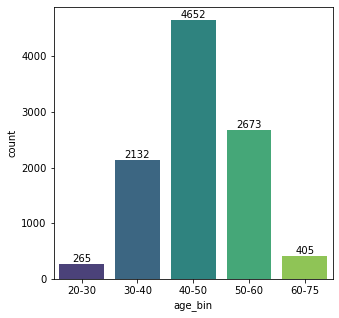

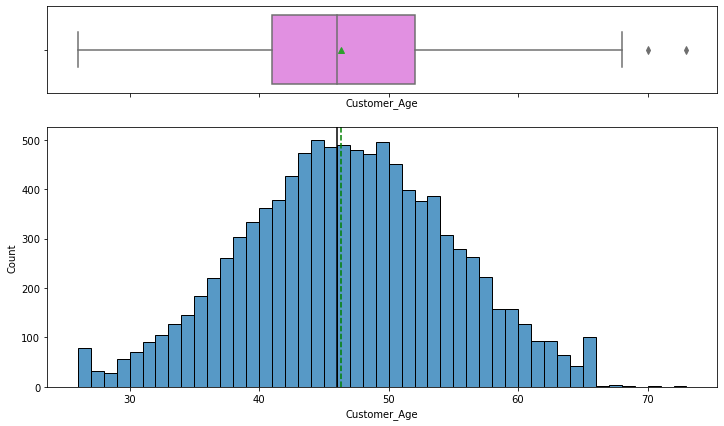

<IPython.core.display.Javascript object>

In [26]:
# plotting countplot for the binned Customer_Age column
plt.figure(figsize=(5, 5))
ax = sns.countplot(data=data, x="age_bin", palette="viridis")
ax.bar_label(ax.containers[0])
plt.show()

# plotting histogram and boxplot for Customer_Age
histogram_boxplot(data, "Customer_Age")

##### Observations
1. A large group of customers belong to the 40-50 age group (4652), followed by 2673 customers in 50-60 age group.
2. There are two outliers to the right of the distribution. 
3. Median age of the dataset is 46.

#### Credit_Limit

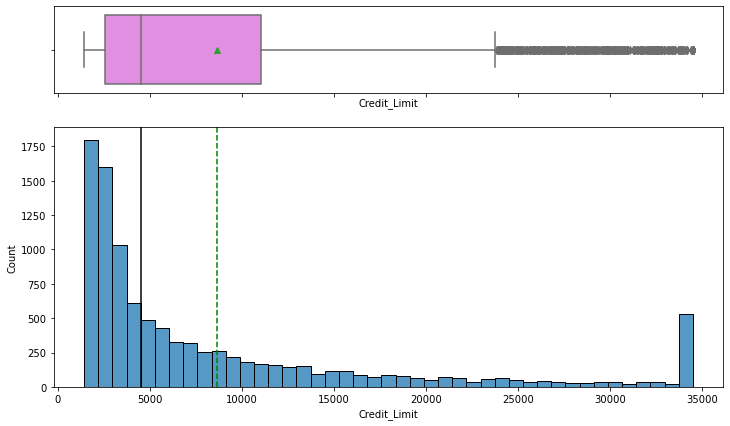

<IPython.core.display.Javascript object>

In [27]:
# histograms and boxplots for Credit_Limit
histogram_boxplot(data, "Credit_Limit")

##### Observations
1. The Credit Limit feature is heavily right skewed, with the presence of many outliers.

#### Avg_Open_To_Buy

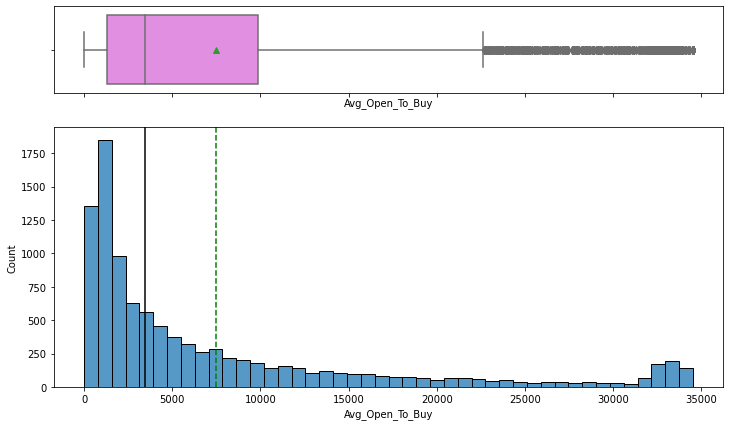

<IPython.core.display.Javascript object>

In [28]:
# histograms and boxplots for Avg_Open_To_Buy
histogram_boxplot(data, "Avg_Open_To_Buy")

##### Observations
1. Avg_Open_To_Buy feature is also heavily skewed, with outliers to the right.
2. Median value of this column is around 4500.

#### Total_Amt_Chng_Q4_Q1

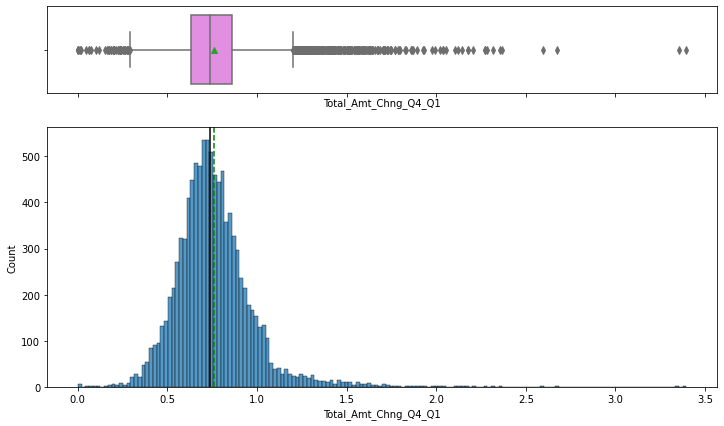

<IPython.core.display.Javascript object>

In [29]:
# histograms and boxplots for Total_Amt_Chng_Q4_Q1
histogram_boxplot(data, "Total_Amt_Chng_Q4_Q1")

##### Observations

1. The Total_Amt_Chng_Q4_Q1 column is also heavily skewed, with outliers on both sides.

#### Total_Ct_Chng_Q4_Q1

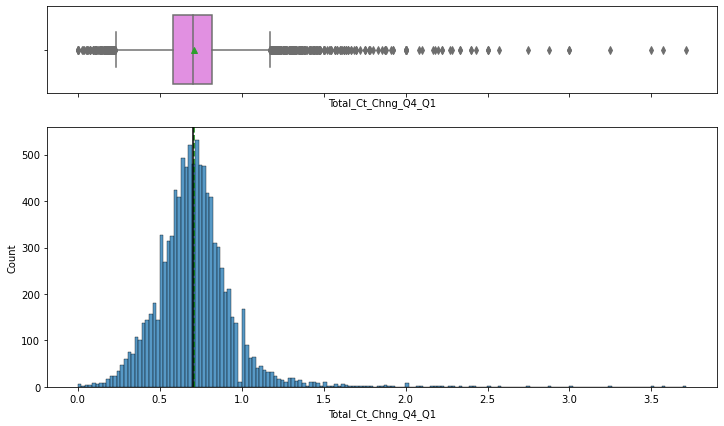

<IPython.core.display.Javascript object>

In [30]:
# histograms and boxplots for Total_Ct_Chng_Q4_Q1
histogram_boxplot(data, "Total_Ct_Chng_Q4_Q1")

##### Observations
1. Total_Ct_Chng_Q4_Q1 is also heavily skewed, with outliers on both sides.

#### Avg_Utilization_Ratio

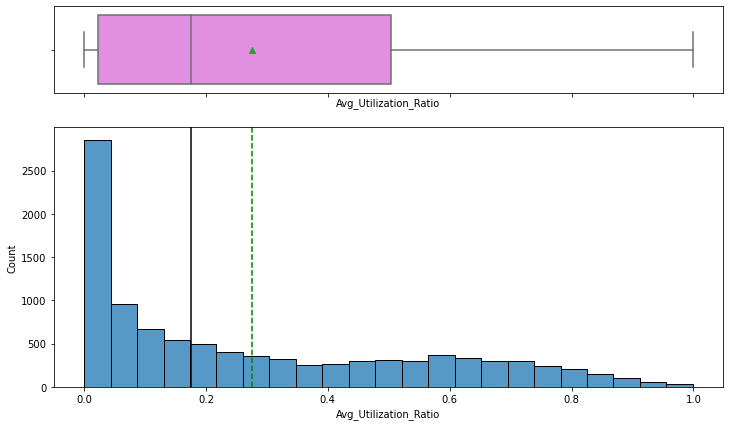

<IPython.core.display.Javascript object>

In [31]:
# histograms and boxplots for Avg_Utilization Ratio
histogram_boxplot(data, "Avg_Utilization_Ratio")

##### Observations
1. Even though there are no outliers in Avg_Utilization_Ratio, the distribution is heavily right skewed.

#### Total_Revolving_Bal

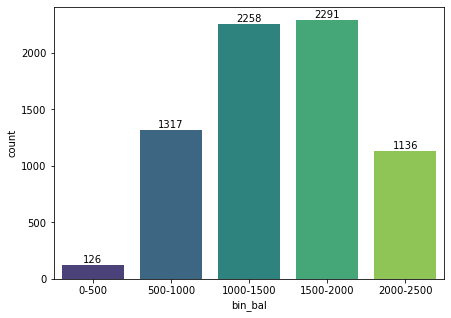

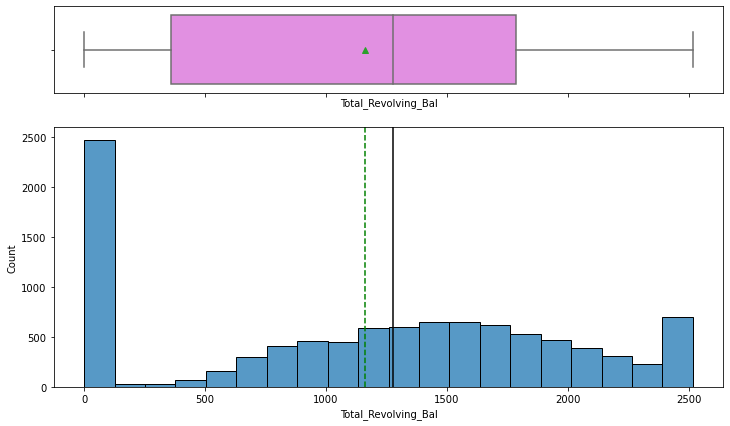

<IPython.core.display.Javascript object>

In [32]:
# plotting countplot for the binned Total_Revolving_Bal column
plt.figure(figsize=(7, 5))
ax = sns.countplot(data=data, x="bin_bal", palette="viridis")
ax.bar_label(ax.containers[0])
plt.show()

# histograms and boxplots for Total_Revolving_Bal
histogram_boxplot(data, "Total_Revolving_Bal")

##### Observations
1. Total_Revolving_Bal does not have any outliers, but the distribution is also not normally distributed. 
2. Most customers (4349) have a balance between 1000-2000. 

#### Total_Trans_Amt

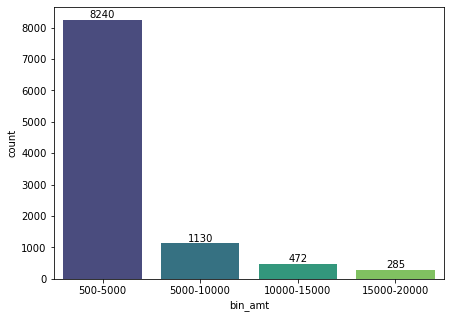

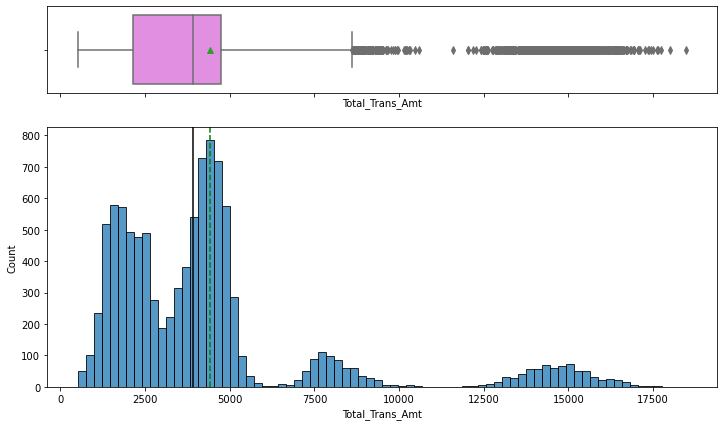

<IPython.core.display.Javascript object>

In [33]:
# plotting countplot for the binned Total_Trans_Amt column
plt.figure(figsize=(7, 5))
ax = sns.countplot(data=data, x="bin_amt", palette="viridis")
ax.bar_label(ax.containers[0])
plt.show()

# histograms and boxplots for Total_Trans_Amt
histogram_boxplot(data, "Total_Trans_Amt")

##### Observations
1. Total_Trans_Amt has heavy outliers, and is heavily right skewed. 
2. Most customers have transacted a total of upto 5000 in the last 12 months. 

#### Total_Trans_Ct

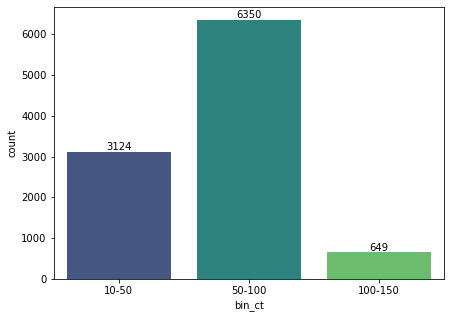

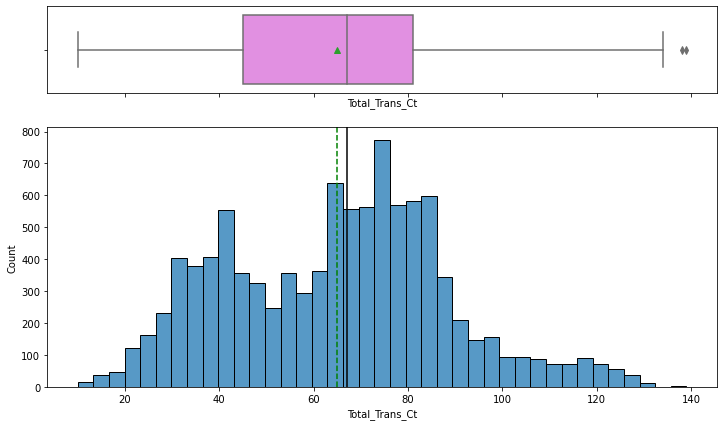

<IPython.core.display.Javascript object>

In [34]:
# plotting countplot for the binned Total_Trans_Ct column
plt.figure(figsize=(7, 5))
ax = sns.countplot(data=data, x="bin_ct", palette="viridis")
ax.bar_label(ax.containers[0])
plt.show()

# histograms and boxplots for Total_Trans_Ct
histogram_boxplot(data, "Total_Trans_Ct")

##### Observations
1. Outliers are very few in the Total_Trans_Ct column, but the histogram is also not normally distributed.
2. Most customers (6350)have transacted atleast 50-100 times in the last 12 months with the bank. 

#### Gender

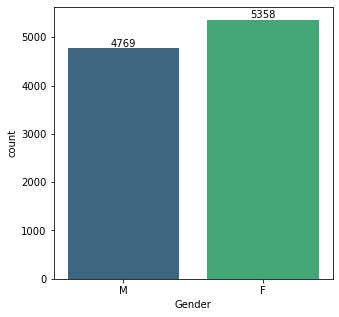

<IPython.core.display.Javascript object>

In [35]:
# plotting countplot for the Gender column
plt.figure(figsize=(5, 5))
ax = sns.countplot(data=data, x="Gender", palette="viridis")
ax.bar_label(ax.containers[0])
plt.show()

##### Observations
1. The dataset is almost balanced in terms of gender, with females slightly higher than males - 5358 compared to 4769.

#### Dependent_count

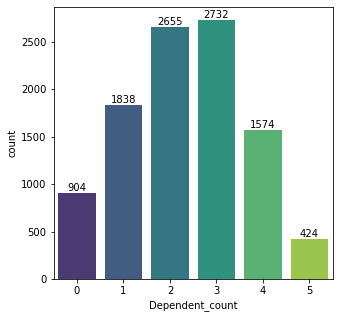

<IPython.core.display.Javascript object>

In [36]:
# plotting countplot for the Dependent_count column
plt.figure(figsize=(5, 5))
ax = sns.countplot(data=data, x="Dependent_count", palette="viridis")
ax.bar_label(ax.containers[0])
plt.show()

##### Observations
1. Most people have 2 or 3 dependents - 2655 and 2732, respectively. This indicates most customers have a very small family to support. 
2. Customers with 5 dependents are least common - only 424. 

#### Education_Level

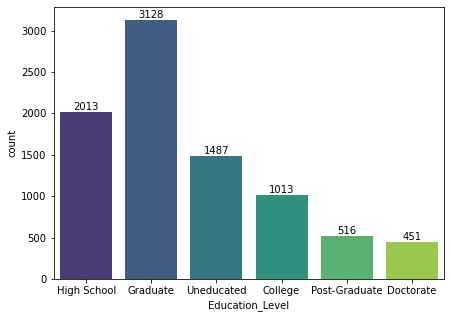

<IPython.core.display.Javascript object>

In [37]:
# plotting countplot for the Education_Level column
plt.figure(figsize=(7, 5))
ax = sns.countplot(data=data, x="Education_Level", palette="viridis")
ax.bar_label(ax.containers[0])
plt.show()

##### Observations
1. Most customers in the dataset are graduates (3128) followed by high-school graduates (2013). 
2. Customers with Doctorate level of education is the least common - only 451.

#### Marital_Status

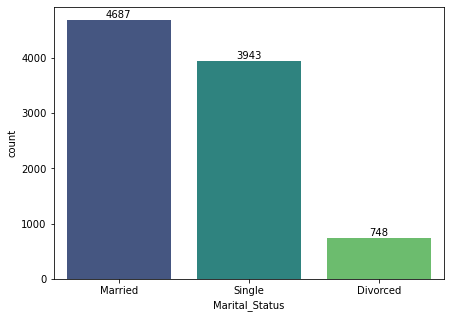

<IPython.core.display.Javascript object>

In [38]:
# plotting countplot for the Marital_Status column
plt.figure(figsize=(7, 5))
ax = sns.countplot(data=data, x="Marital_Status", palette="viridis")
ax.bar_label(ax.containers[0])
plt.show()

##### Observations
1. Most customers are either married (4687) or single (3943). 
2. Very few customers are divorced (748). 

#### Income_Category

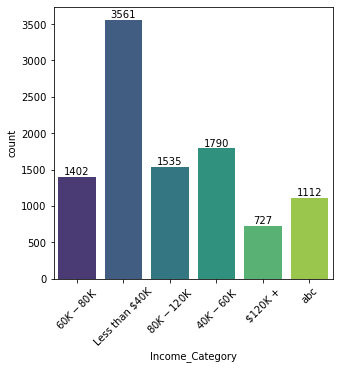

<IPython.core.display.Javascript object>

In [39]:
# plotting countplot for the Income_Category column
plt.figure(figsize=(5, 5))
ax = sns.countplot(data=data, x="Income_Category", palette="viridis")
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.show()

##### Observations
1. Most customers (3561) are belong to the Less than 40K income category, followed by 1790 customers in the 40-60K category. 

#### Card_Category

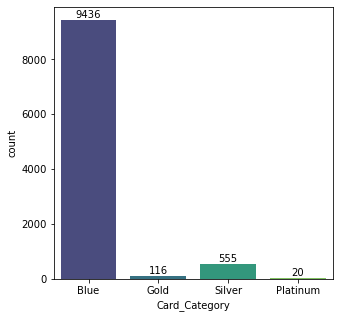

<IPython.core.display.Javascript object>

In [40]:
# plotting countplot for the Card_Category column
plt.figure(figsize=(5, 5))
ax = sns.countplot(data=data, x="Card_Category", palette="viridis")
ax.bar_label(ax.containers[0])
plt.show()

##### Observations
1. Most customers hold a Blue card, which indicates this could be the entry level card. 
2. Platinum card is held by just 20 customers, indicating this could be the premium level card. 

#### Attrition_Flag

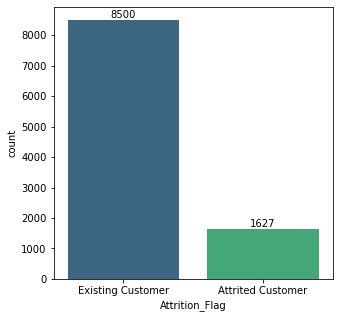

<IPython.core.display.Javascript object>

In [41]:
# plotting countplot for the Attrition_Flag column
plt.figure(figsize=(5, 5))
ax = sns.countplot(data=data, x="Attrition_Flag", palette="viridis")
ax.bar_label(ax.containers[0])
plt.show()

##### Observations
1. The dataset is highly imbalanced in terms of the target variable - Attrition Flag. 83% of the dataset is an existing customer and only 17% belongs to attrited customers. 

#### Months_on_book

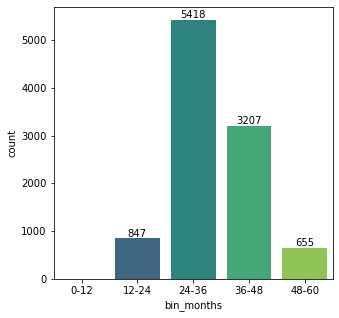

<IPython.core.display.Javascript object>

In [42]:
# plotting countplot for the Months_on_book column
plt.figure(figsize=(5, 5))
ax = sns.countplot(data=data, x="bin_months", palette="viridis")
ax.bar_label(ax.containers[0])
plt.show()

##### Observations
1. Most customers enjoy greater than 2-4 years of relationship with the bank. 5418 customers have 2-3 years of relationship and 3207 customers have 3-4 years of relationship. 
2. Only 655 customers have greater than 4 years of relationship.

#### Total_Relationship_Count

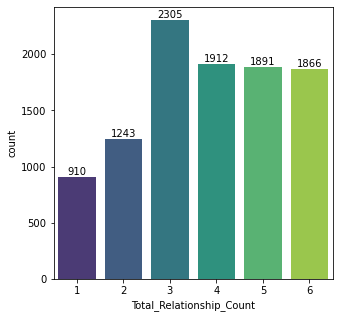

<IPython.core.display.Javascript object>

In [43]:
# plotting countplot for the Total_Relationship_Count column
plt.figure(figsize=(5, 5))
ax = sns.countplot(data=data, x="Total_Relationship_Count", palette="viridis")
ax.bar_label(ax.containers[0])
plt.show()

##### Observations
1. 2305 customers hold 3 products. 
2. Customers who hold 4 or more products are almost close in number. 

#### Months_Inactive_12_mon

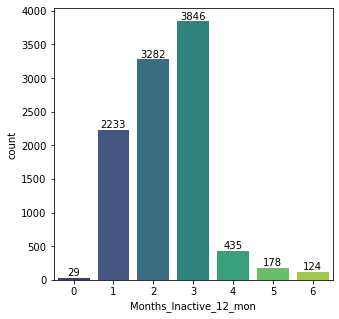

<IPython.core.display.Javascript object>

In [44]:
# plotting countplot for the Months_Inactive_12_mon column
plt.figure(figsize=(5, 5))
ax = sns.countplot(data=data, x="Months_Inactive_12_mon", palette="viridis")
ax.bar_label(ax.containers[0])
plt.show()

##### Observations
1. Most customers are inactive atleast 3 months in the last 12 months. 

#### Contacts_Count_12_mon

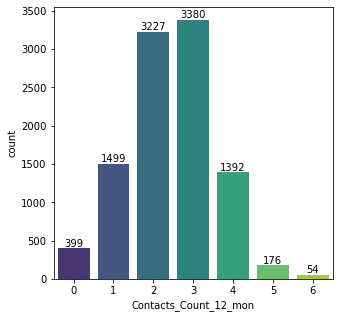

<IPython.core.display.Javascript object>

In [45]:
# plotting countplot for the Contacts_Count_12_mon column
plt.figure(figsize=(5, 5))
ax = sns.countplot(data=data, x="Contacts_Count_12_mon", palette="viridis")
ax.bar_label(ax.containers[0])
plt.show()

##### Observations
1. Most customers (3380) have contacted the bank atleast 3 times in the last 12 months. Only very few customers have contacted the bank 5 times and more. There are 399 customers who have never contacted the bank in the last 12 months. 

### Multivariate Analysis

##### Understanding influence of categorical variables on Attrition_Flag

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
All                          1627               8500  10127
F                             930               4428   5358
M                             697               4072   4769

------------------------------------------------------------------------------------------------------------------------


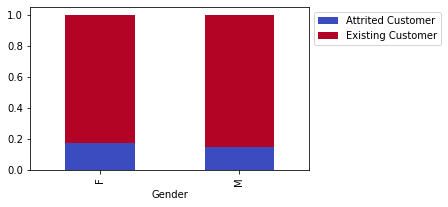

<IPython.core.display.Javascript object>

In [46]:
# plot Gender vs Attrition_Flag
stacked_barplot(data, "Gender", "Attrition_Flag")

Attrition_Flag   Attrited Customer  Existing Customer   All
Education_Level                                            
All                           1371               7237  8608
Graduate                       487               2641  3128
High School                    306               1707  2013
Uneducated                     237               1250  1487
College                        154                859  1013
Doctorate                       95                356   451
Post-Graduate                   92                424   516

------------------------------------------------------------------------------------------------------------------------


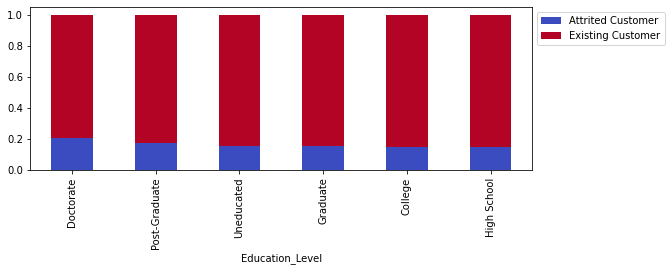

<IPython.core.display.Javascript object>

In [47]:
# plot Education_Level vs Attrition_Flag
stacked_barplot(data, "Education_Level", "Attrition_Flag")

Attrition_Flag  Attrited Customer  Existing Customer   All
Marital_Status                                            
All                          1498               7880  9378
Married                       709               3978  4687
Single                        668               3275  3943
Divorced                      121                627   748

------------------------------------------------------------------------------------------------------------------------


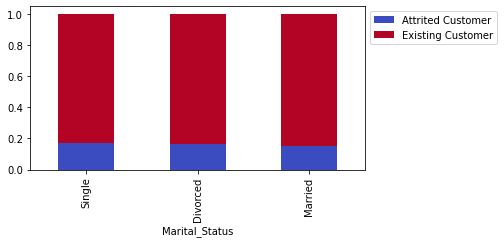

<IPython.core.display.Javascript object>

In [48]:
# plot Marital_Status vs Attrition_Flag
stacked_barplot(data, "Marital_Status", "Attrition_Flag")

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
All                           1627               8500  10127
Less than $40K                 612               2949   3561
$40K - $60K                    271               1519   1790
$80K - $120K                   242               1293   1535
$60K - $80K                    189               1213   1402
abc                            187                925   1112
$120K +                        126                601    727

------------------------------------------------------------------------------------------------------------------------


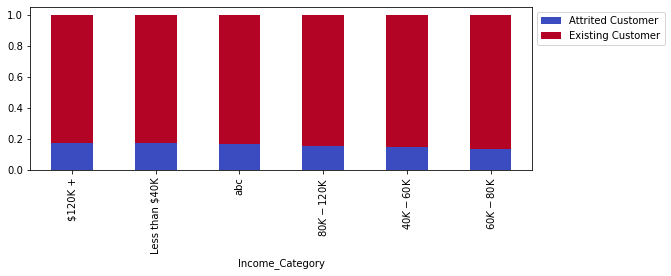

<IPython.core.display.Javascript object>

In [49]:
# plot Income_Category vs Attrition_Flag
stacked_barplot(data, "Income_Category", "Attrition_Flag")

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
All                          1627               8500  10127
Blue                         1519               7917   9436
Silver                         82                473    555
Gold                           21                 95    116
Platinum                        5                 15     20

------------------------------------------------------------------------------------------------------------------------


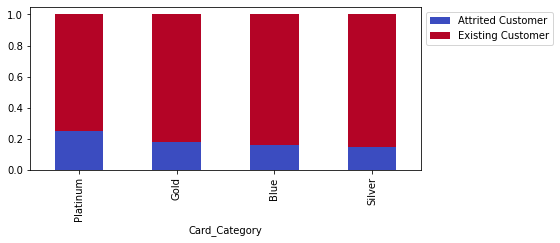

<IPython.core.display.Javascript object>

In [50]:
# plot Card_Category vs Attrition_Flag
stacked_barplot(data, "Card_Category", "Attrition_Flag")

##### Observations
1. From the different barplots of categorical features, we can see that Attrited Customers cannot be distinguished between the different values. But, Females and Platinum card holders are slightly more likely to attrite than their counterparts in the same feature. 

### Understanding correlations

##### Correlation heatmap

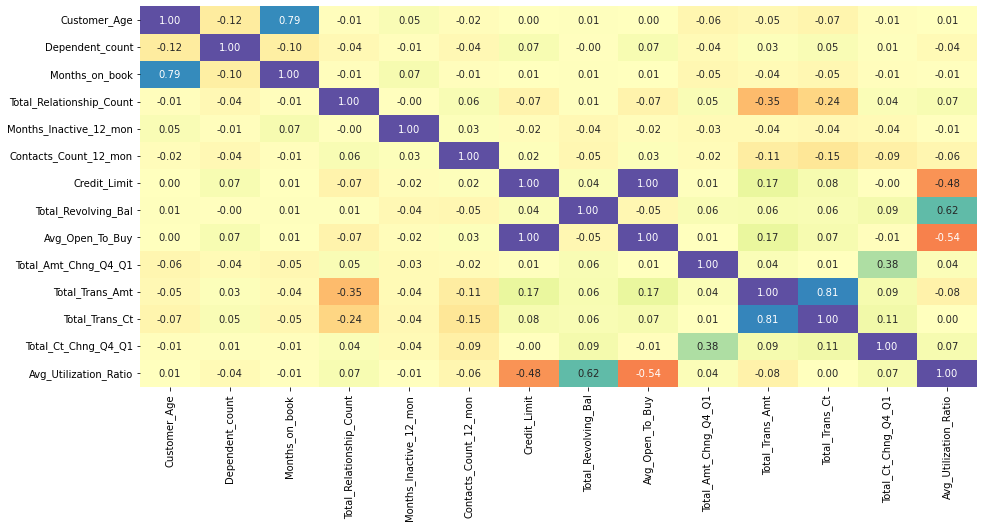

<IPython.core.display.Javascript object>

In [51]:
# heatmap for correlation
plt.figure(figsize=(15, 7))
sns.heatmap(
    data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral", cbar=False
)
plt.show()

##### Boxplots for all numerical variables vs Attrition_Flag

Let's plot the numerical variables against the Attrition_Flag and see if any variables have an influence on the attrition flag.

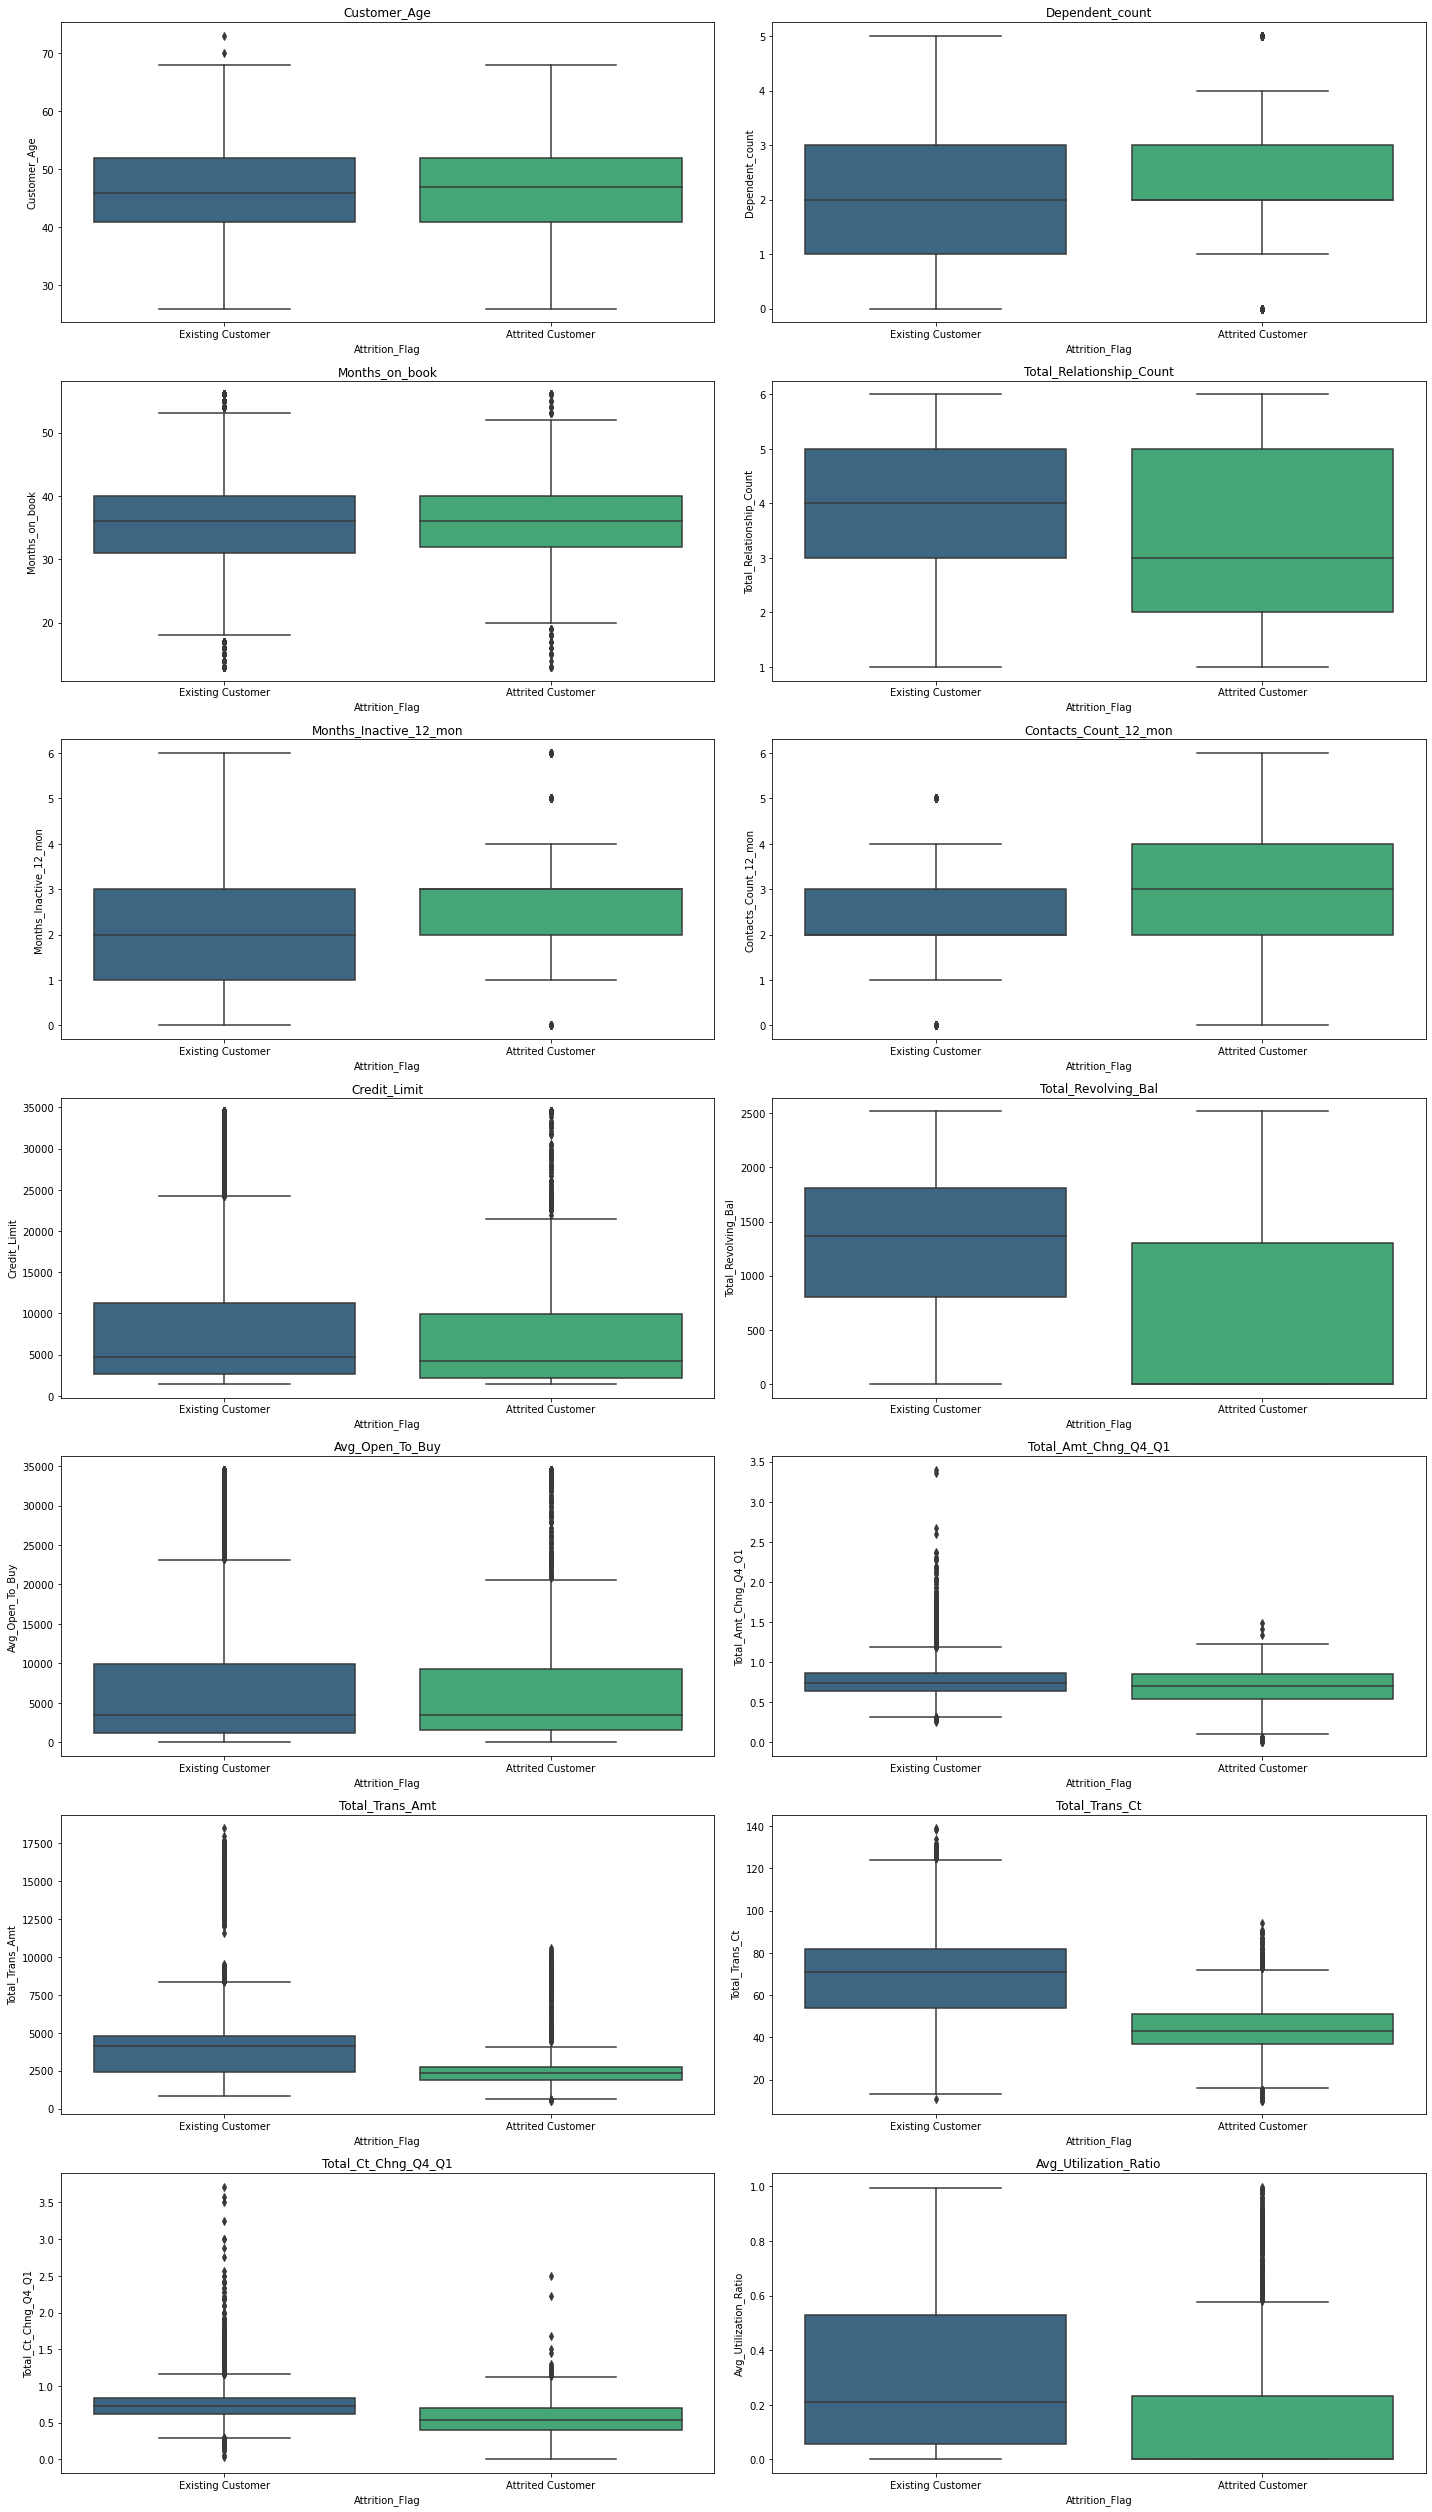

<IPython.core.display.Javascript object>

In [52]:
# for all numerical variables draw box plots
plt.figure(figsize=(20, 35))
for i, variable in enumerate(num_cols):
    plt.subplot(7, 2, i + 1)
    sns.boxplot(data["Attrition_Flag"], data[variable], palette="viridis")
    plt.tight_layout()
    plt.title(variable)
plt.show()

##### Pairplots

<Figure size 1080x504 with 0 Axes>

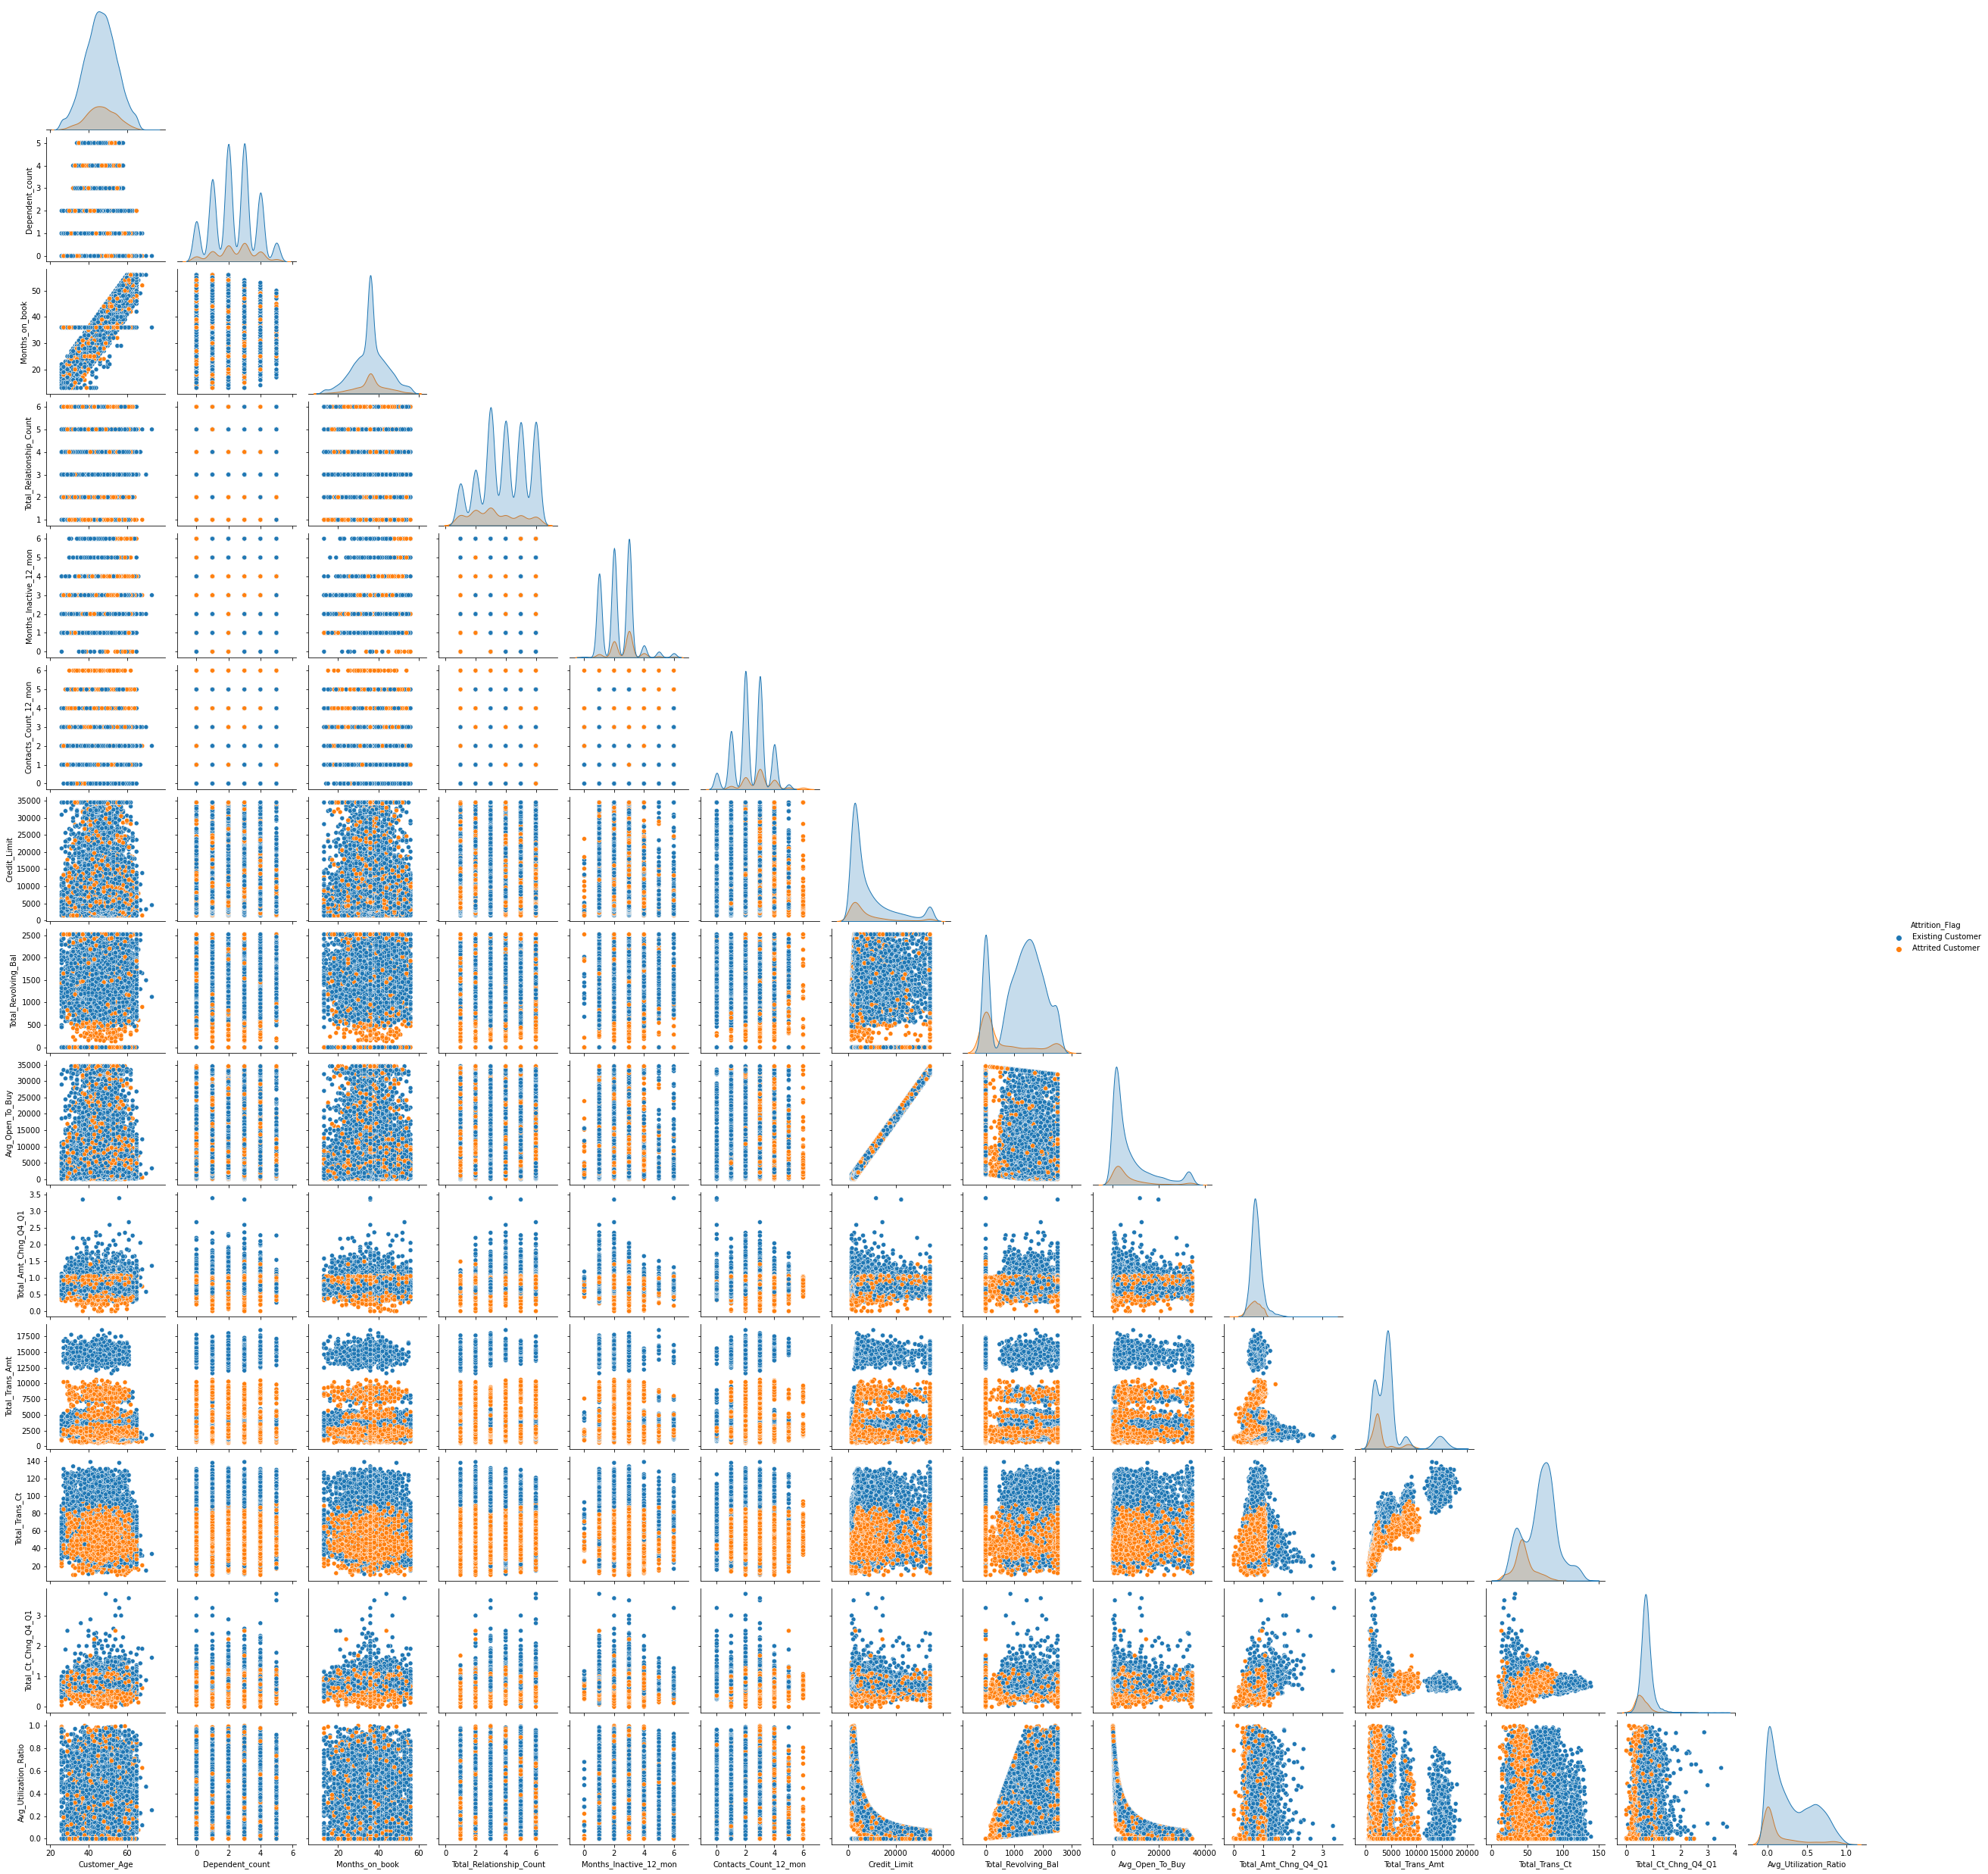

<IPython.core.display.Javascript object>

In [53]:
# pairplot to understand relationships
plt.figure(figsize=(15, 7))
sns.pairplot(data, hue="Attrition_Flag", corner=True)
plt.show()

##### Checking the relationship between Attrition_Flag and Numerical variables

In [54]:
# Mean of numerical variables grouped by attrition flag
data.groupby(["Attrition_Flag"])[num_cols].mean()

Customer_Age  Dependent_count  Months_on_book  \
Attrition_Flag                                                     
Attrited Customer        46.659            2.403          36.178   
Existing Customer        46.262            2.335          35.881   

                   Total_Relationship_Count  Months_Inactive_12_mon  \
Attrition_Flag                                                        
Attrited Customer                     3.280                   2.693   
Existing Customer                     3.915                   2.274   

                   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
Attrition_Flag                                                                
Attrited Customer                  2.972      8136.039              672.823   
Existing Customer                  2.356      8726.878             1256.604   

                   Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
Attrition_Flag                                                              
Attrited Customer         7463.216                 0.694         3095.026   
Existing Customer         7470.273                 0.773         4654.656   

                   Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
Attrition_Flag                                                                 
Attrited Customer          44.934                0.554                  0.162  
Existing Customer          68.673                0.742                  0.296

<IPython.core.display.Javascript object>

##### Observations
From the different plots above, we can infer the following:
1. The following parameters have strong positive correlations:
    - Months_on_book and Customer_Age: 0.79
    - Total_Revolving_Bal and Avg_Utilization_Ratio: 0.64
    - Total_Trans_Ct and Total_Trans_Amt: 0.81
    - Avg_Open_To_Buy and Credit_Limit: 1.0
2. The following features have strong negative correlations:
    - Credit_Limit and Avg_Utilization_Ratio: 0.48
    - Avg_Open_To_Buy and Avg_Utilization_Ratio:0.54
3. The following numerical parameters have a strong influence on the Attrition_Flag:
    - Total_Revolving_Bal
    - Total_Trans_Ct
    - Total_Ct_Chng_Q4_Q1
    - Avg_Utilization_Ratio
    

### Understanding customers who attrite

Let's build a profile of customers who have attrited from the bank, by first isolating the Attrited Customers into a dataframe. The key assumption to note here is that we are making these inferences out of 17% of the total dataset, therefore these inferences may tend to vary when we have a larger representation. 

In [55]:
# collecting attrited customers into a dataframe
attrited = data[data["Attrition_Flag"] == "Attrited Customer"]
attrited.shape

(1627, 25)

<IPython.core.display.Javascript object>

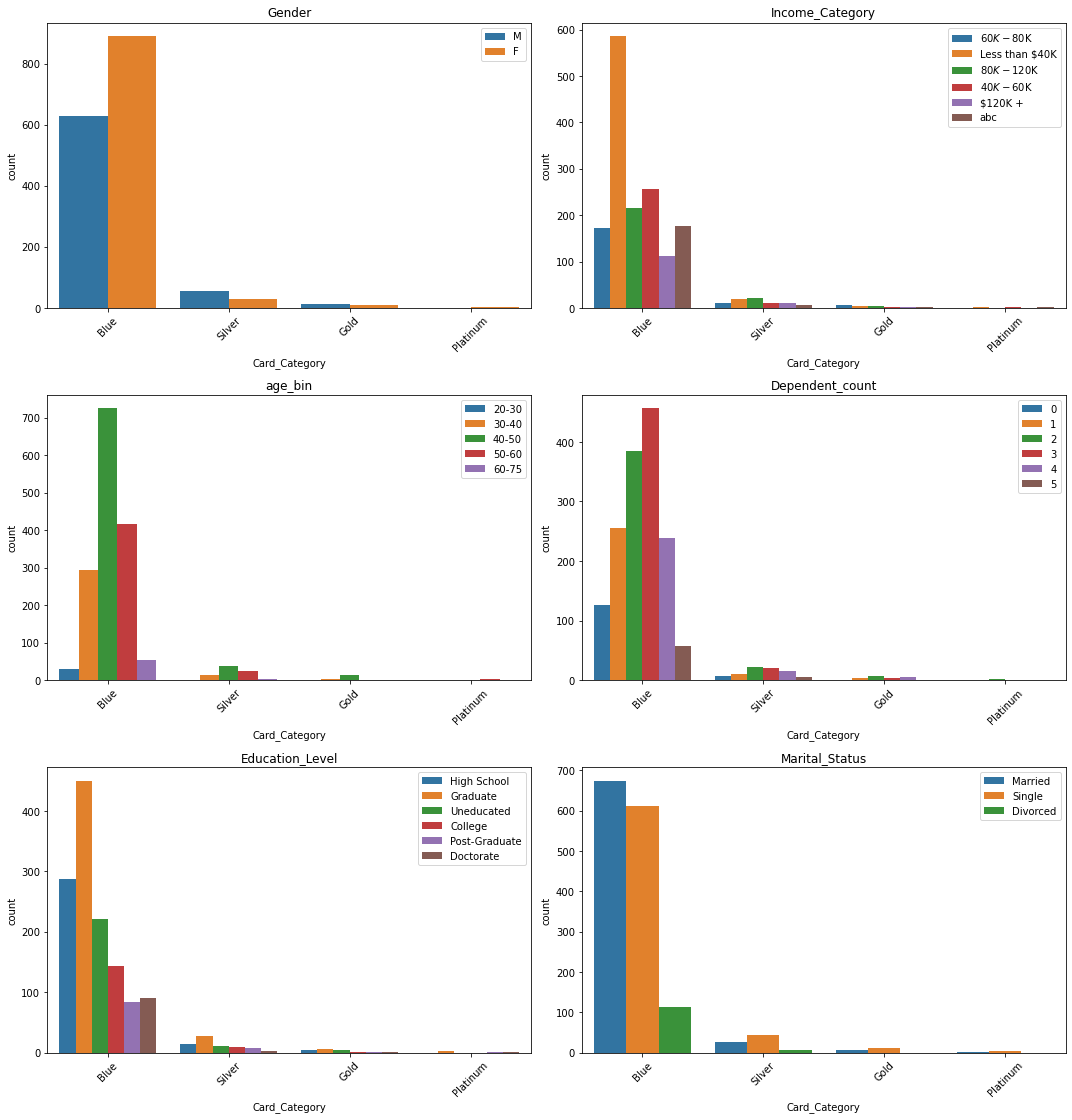

<IPython.core.display.Javascript object>

In [56]:
# plotting the different customer profile features against the Card_Category
plt.figure(figsize=(15, 20))

for i, variable in enumerate(cust_prof):
    if variable != "Card_Category":
        plt.subplot(4, 2, i + 1)
        sns.countplot(
            data=attrited, x="Card_Category", hue=data[variable],
        )
        plt.tight_layout()
        plt.title(variable)
        plt.xticks(rotation=45)
        plt.legend(loc="upper right")
plt.show()

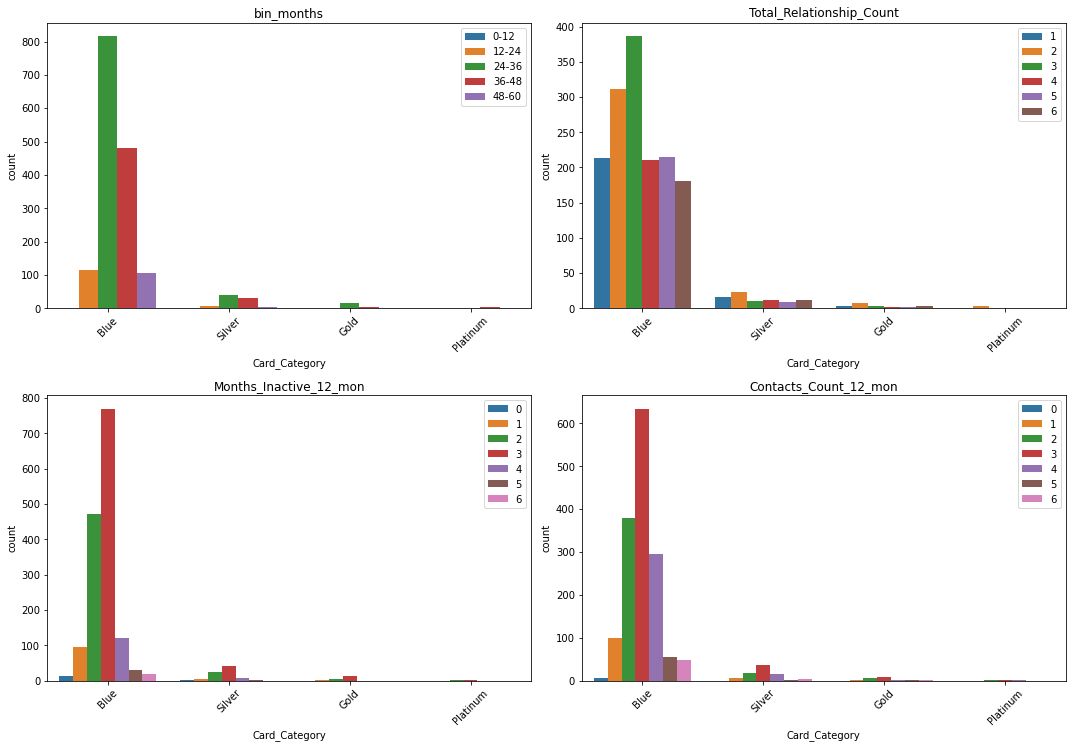

<IPython.core.display.Javascript object>

In [57]:
# plotting the relationship parameters against the card category
plt.figure(figsize=(15, 20))

for i, variable in enumerate(relationship):
    plt.subplot(4, 2, i + 1)
    sns.countplot(
        data=attrited, x="Card_Category", hue=data[variable],
    )
    plt.tight_layout()
    plt.title(variable)
    plt.xticks(rotation=45)
    plt.legend(loc="upper right")
plt.show()

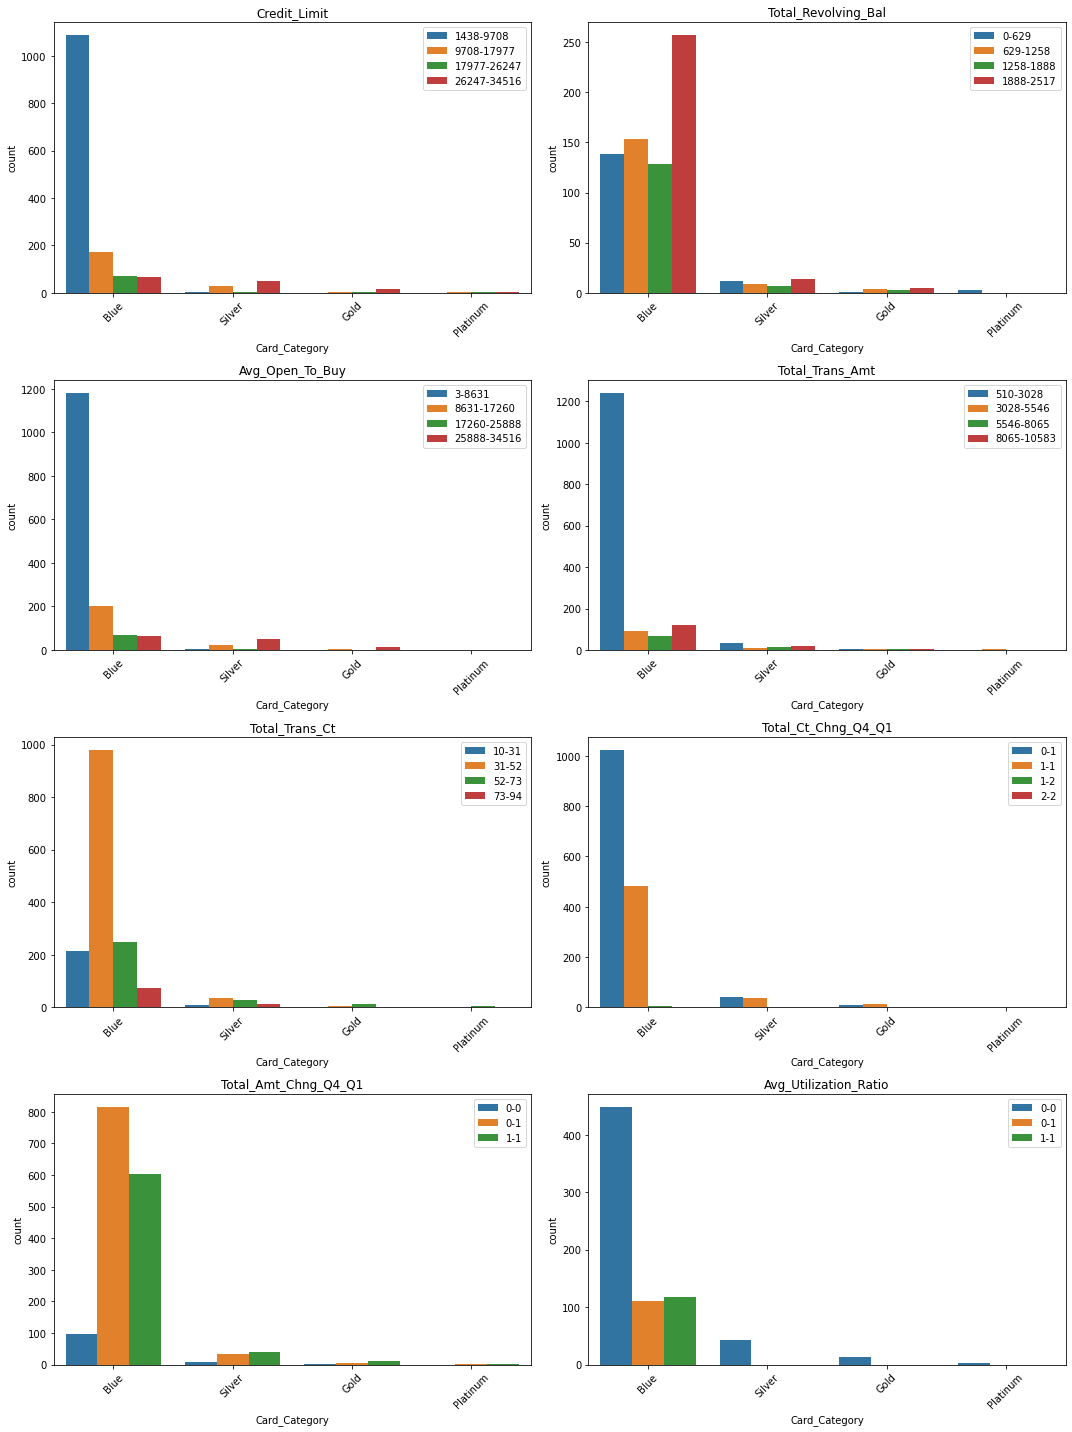

<IPython.core.display.Javascript object>

In [58]:
# plotting credit & balance related features against Card_Category
plt.figure(figsize=(15, 20))

for i, col in enumerate(credit):
    # create bins using numpy
    bins = np.linspace(attrited[col].min(), attrited[col].max(), 5)

    # create a new column with bin labels
    bin_labels = [f"{round(bins[x])}-{round(bins[x+1])}" for x in range(len(bins) - 1)]
    attrited[f"{col}_bin"] = pd.cut(
        attrited[col], bins=bins, labels=bin_labels, ordered=False
    )

    # plot a countplot
    plt.subplot(4, 2, i + 1)
    sns.countplot(x="Card_Category", hue=f"{col}_bin", data=attrited)
    plt.tight_layout()
    plt.title(col)
    plt.xticks(rotation=45)
    plt.legend(loc="upper right")
plt.show()

##### Observations
**Customer Profile**
- Blue: Females slightly outnumber males in this group. These customers belong to the 40-50 age group, have an income of less than 40K, have 2 or 3 dependents, are graduates and are mostly married,  
- Silver: Slightly more males than females, belong to the 40-60 age group, can belong to any income category or education level, have 2-4 dependents. Singles slightly outnumber married/divorced customers.
- Gold: They are Both male and female, belong to the 40-50 age group, have a wide range of incomes, have 2-3 dependents, are graduates and are mostly single.
- Platinum: Not enough data to make meaningful inferences.

**Relationship Strategy**
- Blue: They have a long relationship of 2-4 years, and have upto 6 products. Most of them contact the bank atleast 3 times in the last 12 months
- Silver: They have a relationship of 2-4 years, can have multiple products upto 6, and contact the bank atleast 2-3 times a year.
- Gold: They have a relationship of 2-3 years, multiple products and contact atleast 2-3 times a year
- Platinum: Not enough data to make meaningful inferences.

**Credit & Balance**
- Blue: Most customers have a credit limit from 1400-9700. Most customers have upto 17000 left on the card to spend. The majority spend a total of 500-3000 in a year, and make 30-50 transactions in a year. 
- Silver: Most customers have a credit limit from 25000-35000. Most customers have upto 35000 left on the card to spend. The majority make 30-100 transactions in a year. 
- Gold: Most customers have a credit limit from 25000-35000. Most customers have upto 35000 left on the card to spend. Unable to discern the number of transactions or amounts they transact in a year.
- Platinum: Not enough data to make meaningful inferences.

### Outlier Detection in numerical columns

We'll detect outliers using the IQR method.

In [59]:
# calculating the Q1 and Q3 values outside of which outliers exist
# this code will print the columns with the number of outliers, and the upper and lower limits of the outliers
for col in num_cols:
    quartiles = np.quantile(data[col], [0.25, 0.75])
    Q1 = quartiles[0]
    Q3 = quartiles[1]
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = np.logical_or(data[col] < lower, data[col] > upper)
    print(
        "Number of Outliers in", col, "are", outliers.sum(),
    )
    if outliers.sum() > 0:
        if lower > 0:
            print("Outlier values of", col, "are lower than", f"{lower}")
        if upper > 0:
            print("Outlier values of", col, "are greater than", f"{upper}")
    print("\n")

Number of Outliers in Customer_Age are 2
Outlier values of Customer_Age are lower than 24.5
Outlier values of Customer_Age are greater than 68.5


Number of Outliers in Dependent_count are 0


Number of Outliers in Months_on_book are 386
Outlier values of Months_on_book are lower than 17.5
Outlier values of Months_on_book are greater than 53.5


Number of Outliers in Total_Relationship_Count are 0


Number of Outliers in Months_Inactive_12_mon are 331
Outlier values of Months_Inactive_12_mon are lower than 0.5
Outlier values of Months_Inactive_12_mon are greater than 4.5


Number of Outliers in Contacts_Count_12_mon are 629
Outlier values of Contacts_Count_12_mon are lower than 0.5
Outlier values of Contacts_Count_12_mon are greater than 4.5


Number of Outliers in Credit_Limit are 984
Outlier values of Credit_Limit are greater than 23836.25


Number of Outliers in Total_Revolving_Bal are 0


Number of Outliers in Avg_Open_To_Buy are 963
Outlier values of Avg_Open_To_Buy are greater th

<IPython.core.display.Javascript object>

##### Observations
1. The following features have very high outliers:
- Credit_Limit
- Avg_Open_To_Buy
- Total_Amt_Chng_Q4_Q1
- Total_Ct_Chng_Q4_Q1
- Total_Trans_Amt
- Months_on_book 
- Months_Inactive_12_mon
- Contacts_Count_12_mon 
2. Customer_Age and Total_Trans_Ct have very few outliers, let's verify what is happening in these columns.

##### Understanding outliers in Customer_Age and Total_Trans_Ct

In [60]:
data[(data["Customer_Age"] < 24.5) | (data["Customer_Age"] > 68.5)]

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
251  Existing Customer            73      M                0     High School   
254  Existing Customer            70      M                0     High School   

    Marital_Status Income_Category Card_Category  Months_on_book  \
251        Married     $40K - $60K          Blue              36   
254        Married  Less than $40K          Blue              56   

     Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
251                         5                       3                      2   
254                         3                       2                      3   

     Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
251      4469.000                 1125         3344.000                 1.363   
254      3252.000                 1495         1757.000                 0.581   

     Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
251             1765              34                1.615   
254             1227              15                0.875   

     Avg_Utilization_Ratio age_bin bin_months    bin_bal bin_ct   bin_amt  
251                  0.252   60-75      24-36  1000-1500  10-50  500-5000  
254                  0.460   60-75      48-60  1000-1500  10-50  500-5000

<IPython.core.display.Javascript object>

Outliers (70,73) are closer to the upper limit of 68.5. 

In [61]:
data[(data["Total_Trans_Ct"] > 135)]

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
9324  Existing Customer            41      M                3             NaN   
9586  Existing Customer            56      F                1     High School   

     Marital_Status Income_Category Card_Category  Months_on_book  \
9324        Married         $120K +          Blue              33   
9586        Married             abc          Blue              49   

      Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
9324                         2                       4                      3   
9586                         1                       2                      1   

      Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
9324     34516.000                  638        33878.000   
9586     17542.000                 2517        15025.000   

      Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
9324                 0.724            13085             139   
9586                 0.800            13939             138   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio age_bin bin_months   bin_bal  \
9324                0.675                  0.018   40-50      24-36  500-1000   
9586                0.792                  0.143   50-60      48-60       NaN   

       bin_ct      bin_amt  
9324  100-150  10000-15000  
9586  100-150  10000-15000

<IPython.core.display.Javascript object>

Outliers (138,139) are closer to the upper limit of 135.0.

##### Understanding outliers in other columns

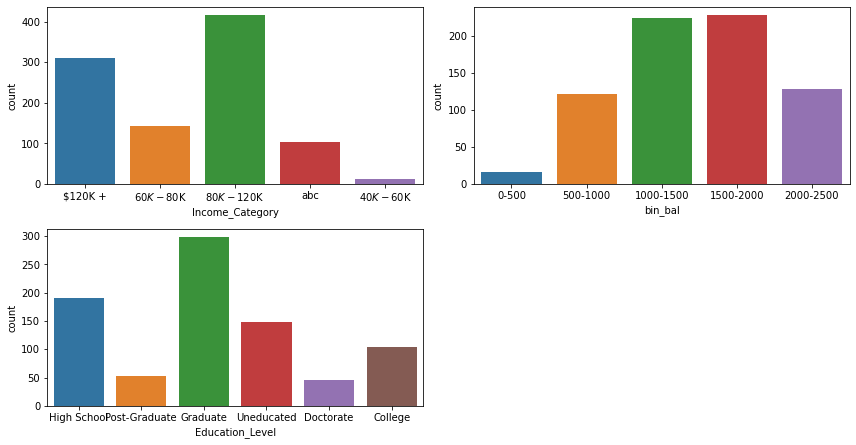

<IPython.core.display.Javascript object>

In [62]:
# Understanding the outliers in Credit_Limit
# check the relationship with "Income_Category", "Total_Revolving_Bal","Education_Level"
cols = ["Income_Category", "bin_bal","Education_Level"]

#upper limit identified in outlier detection
lim = 23836.25

#isolating the data that exceeds the upper limit
data_lim = data[data["Credit_Limit"] > lim]

plt.figure(figsize=(12,12))

# Loop through variables and plot countplots
for i, col in enumerate(cols):
    plt.subplot(4, 2, i + 1)
    sns.countplot(data=data_lim, x=col,)


plt.tight_layout()

# Show plot
plt.show()


##### Observation
1. The higher values of Credit Limit seem to correspond to higher income ranges, i.e., greater than 80K. 
2. Revolving balances are also towards the higher side for such customers. 
3. Credit Limits are higher for Graduates, which also seems plausible, as working individuals tend to have better credit limits than students. 

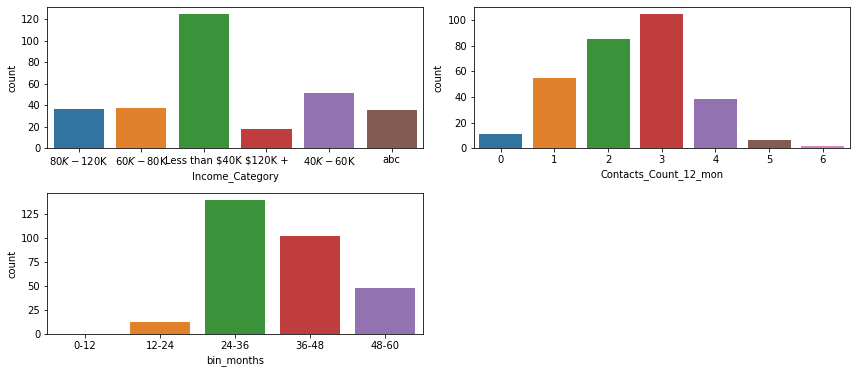

<IPython.core.display.Javascript object>

In [63]:
# Understanding the outliers in Months_Inactive_12_mon
# check the relationship with "Income_Category", "Contacts_Count_12_mon", "Months_on_book"
cols = ["Income_Category", "Contacts_Count_12_mon", "bin_months"]

# upper limit identified in outlier detection
lim = 4.5

# isolating the data that exceeds the upper limit
data_lim = data[data["Months_Inactive_12_mon"] > lim]

plt.figure(figsize=(12, 10))

# Loop through variables and plot countplots
for i, col in enumerate(cols):
    plt.subplot(4, 2, i + 1)
    sns.countplot(
        data=data_lim, x=col,
    )


plt.tight_layout()

# Show plot
plt.show()

##### Observations
1. Customers with greater months of inactivity show very poor balance, less than 40K, contact the bank less than 3 times a year and maintain

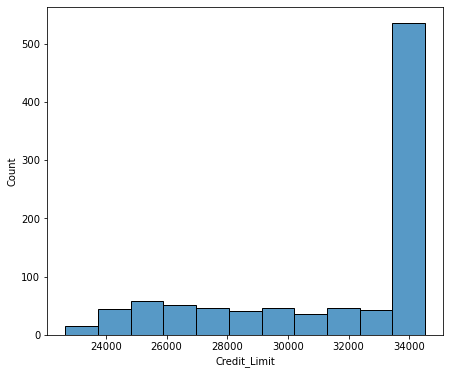

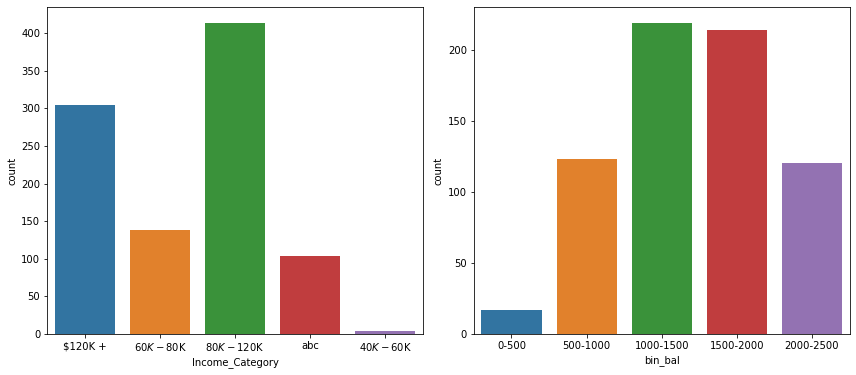

<IPython.core.display.Javascript object>

In [64]:
# # Understanding the outliers in Avg_Open_To_Buy
# check the relationship with "Credit_Limit"
cols_num = ["Credit_Limit"]

# upper limit identified in outlier detection
lim = 22660.75

# isolating the data that exceeds the upper limit
data_lim = data[data["Avg_Open_To_Buy"] > lim]

plt.figure(figsize=(12, 10))

# Loop through variables and plot countplots
for i, col in enumerate(cols_num):
    plt.subplot(2, 2, i + 1)
    sns.histplot(
        data=data_lim, x=col,
    )
plt.tight_layout()
plt.show()


# check the relationship with "Income_Category", Total_Revolving_Bal"
cols_cat = ["Income_Category", "bin_bal"]
plt.figure(figsize=(12, 10))
for i, col in enumerate(cols_cat):
    plt.subplot(2, 2, i + 1)
    sns.countplot(
        data=data_lim, x=col,
    )

plt.tight_layout()

# Show plot
plt.show()

##### Observations 
1. The higher Avg_Open_to_Buy seems to correspond with higher credit limits, income categories and revolving balances.

#### Observations & conclusions on outliers
1. There are outliers in many columns - Customer_Age, Months_on_book, Months_Inactive_12_mon, Contacts_Count_12_mon, Credit_Limit, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1. 
2. There are only 2 outliers in Total_Trans_Ct and Customer_Age. However, in both these columns, the outlier values are closer to the upper limit. Therefore, these values need not be treated but can be retained as actual values. 
3. For the rest of the columns, the outliers are very high. 
4. However, on analysing these outliers, we can see that they correlate well with the rest of the features and make sense. 

Since the outliers were found to be significant and relevant, we will not drop these outliers so as not to lose significant data. We will also not transform these outliers since there is always the possibility that they will present themselves in production data. 


### Building the model

We will build the models in the following manner

1. Build 7 models using decision trees, logistic regression and ensemble techniques.
2. Try to improve upon these models using oversampling and undersampling techniques,
3. Tune the most promising models using Random Search CV
4. The best model will be tuned using Grid Search CV with the hyperparameters returned by Random Search CV

### Model Evaluation Criteria

The target variable Attrition_Flag will be encoded as below:
- Attrited Customer: 1
- Existing Customer: 0

When we build the model, the following outcomes can be wrongly predicted.

**Predicting a customer will stay/retain credit card services, but actually will not.** (Predicts Negative, but Actually Positive: Case of False Negative)
In this case, the bank would not have targeted this customer for improving relationships. A wrong prediction of this sort can be very expensive to the company by losing the customer as well as the loss of potential fees and other sources of revenue.

**Predicting a customer will attrite, but actually will not.** (Predicts Positives, but Actually Negative:: Case of False Positives)
In this case, when the customer is identified with the potential to attrite, the company would spend resources to improve and continue the relationship with the customer. Of course, in this case loss of resources could have been avoided, but this loss is not as severe as the above case. 

### Objective of the model
The stated objective of the business is to predict which customer is likely to leave the product, therefore it is necessary to identify as many potential customers as possible, and reduce False Negatives. Therefore, we must aim at increasing recall.

Recall is the metric of interest here.

### Data Preparation for Modeling

In [65]:
# make a copy of the dataframe
df = thera.copy()

<IPython.core.display.Javascript object>

#### Dropping CLIENTNUM

In [66]:
# Dropping column - CLIENTNUM
df.drop(columns=["CLIENTNUM"], inplace=True)

<IPython.core.display.Javascript object>

#### Verify duplicates

Now that CLIENTNUM has been dropped, we can do another round of duplicate check to verify there is indeed no duplicates in the dataframe. 

In [67]:
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

There are no duplicates in the dataframe.

#### Correcting wrong values in Income_Category

We have seen from the EDA that there are values like "abc" in the Income_Category column. Let's replace it with nan values. 

In [68]:
# count of values in Income_Category
df.Income_Category.value_counts(dropna=False)

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64

<IPython.core.display.Javascript object>

There are 1112 values rows with the wrong value. 

In [69]:
# replace abc values with nan
df.Income_Category.replace(to_replace="abc", value=np.nan, inplace=True)

<IPython.core.display.Javascript object>

In [70]:
# verifying the counts again
df.Income_Category.value_counts(dropna=False)

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
NaN               1112
$120K +            727
Name: Income_Category, dtype: int64

<IPython.core.display.Javascript object>

1112 values have been replaced with nan. We can try to impute this later. 

In [71]:
# Separating target variable and other variables
X = df.drop(columns="Attrition_Flag")

# make dependent variable
y = df["Attrition_Flag"]

# check head
X.head()

Customer_Age Gender  Dependent_count Education_Level Marital_Status  \
0            45      M                3     High School        Married   
1            49      F                5        Graduate         Single   
2            51      M                3        Graduate        Married   
3            40      F                4     High School            NaN   
4            40      M                3      Uneducated        Married   

  Income_Category Card_Category  Months_on_book  Total_Relationship_Count  \
0     $60K - $80K          Blue              39                         5   
1  Less than $40K          Blue              44                         6   
2    $80K - $120K          Blue              36                         4   
3  Less than $40K          Blue              34                         3   
4     $60K - $80K          Blue              21                         5   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3     12691.000   
1                       1                      2      8256.000   
2                       1                      0      3418.000   
3                       4                      1      3313.000   
4                       1                      0      4716.000   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777        11914.000                 1.335   
1                  864         7392.000                 1.541   
2                    0         3418.000                 2.594   
3                 2517          796.000                 1.405   
4                    0         4716.000                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

<IPython.core.display.Javascript object>

In [72]:
# check y value counts
y.value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

<IPython.core.display.Javascript object>

### Splitting data into training, validation and test set:

In [73]:
# Splitting data into training, validation and test sets:
# first we split data into 2 parts, say temporary and test

# split into 80% temp and 20% test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation in 75-25 ratio

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 19) (2026, 19) (2026, 19)


<IPython.core.display.Javascript object>

In order to prevent any data leakage, we will perform the next operations on the different datasets separately. 
- Target variable encoding
- Missing value imputation
- OneHotEncoding categorical variables

In [74]:
# encode the target variable in train set
y_train.replace(
    to_replace={"Attrited Customer": 1, "Existing Customer": 0}, inplace=True
)
# encode the target variable in validation set
y_val.replace(to_replace={"Attrited Customer": 1, "Existing Customer": 0}, inplace=True)

# encode the target variable in test set
y_test.replace(
    to_replace={"Attrited Customer": 1, "Existing Customer": 0}, inplace=True
)


<IPython.core.display.Javascript object>

In [75]:
# printing the value counts in each set after encoding
print("y_train")
display(y_train.value_counts())
print("\n")
print("y_val")
display(y_val.value_counts())
print("\n")
print("y_test")
display(y_test.value_counts())

y_train


0    5099
1     976
Name: Attrition_Flag, dtype: int64



y_val


0    1700
1     326
Name: Attrition_Flag, dtype: int64



y_test


0    1701
1     325
Name: Attrition_Flag, dtype: int64

<IPython.core.display.Javascript object>

### Missing-Value Treatment

From our EDA, we have found that there are missing values in Education_Level, Marital_Status, Income_Category. Let's impute these missing values with the most frequent values in each column.

In [76]:
# Let's impute the missing values with most frequent strategy
imp_mode = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

# list of columns which require imputation
cols_to_impute = ["Education_Level", "Marital_Status", "Income_Category"]

# fit and transform the imputer on train data
X_train[cols_to_impute] = imp_mode.fit_transform(X_train[cols_to_impute])

# Transform on validation and test data
X_val[cols_to_impute] = imp_mode.transform(X_val[cols_to_impute])

# fit and transform the imputer on test data
X_test[cols_to_impute] = imp_mode.transform(X_test[cols_to_impute])

<IPython.core.display.Javascript object>

Let's verify whether any null values exist in the datasets after imputing

In [77]:
X_train.isnull().sum()

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

<IPython.core.display.Javascript object>

In [78]:
X_val.isnull().sum()

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

<IPython.core.display.Javascript object>

In [79]:
X_test.isnull().sum()

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

<IPython.core.display.Javascript object>

There are no null values in any columns.

### Encoding categorical variables

We can encode categorical variables using OneHotEncoding. Since this is a classification problem, let's not drop the first column after encoding. 

In [80]:
# verify the dataframe before encoding
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6075 entries, 9501 to 703
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              6075 non-null   int64  
 1   Gender                    6075 non-null   object 
 2   Dependent_count           6075 non-null   int64  
 3   Education_Level           6075 non-null   object 
 4   Marital_Status            6075 non-null   object 
 5   Income_Category           6075 non-null   object 
 6   Card_Category             6075 non-null   object 
 7   Months_on_book            6075 non-null   int64  
 8   Total_Relationship_Count  6075 non-null   int64  
 9   Months_Inactive_12_mon    6075 non-null   int64  
 10  Contacts_Count_12_mon     6075 non-null   int64  
 11  Credit_Limit              6075 non-null   float64
 12  Total_Revolving_Bal       6075 non-null   int64  
 13  Avg_Open_To_Buy           6075 non-null   float64
 14  Total_

<IPython.core.display.Javascript object>

In [81]:
#list of columns to encode
cols_to_encode = [
        "Gender",
        "Education_Level",
        "Marital_Status",
        "Income_Category",
        "Card_Category",
    ]


<IPython.core.display.Javascript object>

We only need to encode a few columns from the dataset. So we will need to extract these columns first, encode them and the concatenate to recreate the original dataframe.

In [82]:
# Create a OneHotEncoder object
# handle_unknown = "ignore", allows model to handle any unknown category in the test data
ohe = OneHotEncoder(sparse=False, handle_unknown="ignore")

# create an array after onehotencoding the columns
array_train_encoded = ohe.fit_transform(X_train[cols_to_encode])

# Convert the above array to a dataframe
data_train_encoded = pd.DataFrame(
    array_train_encoded,
    index=X_train.index,
    columns=ohe.get_feature_names(cols_to_encode),
)

# Extract only the columns that didnt need to be encoded
data_other_cols = X_train.drop(columns=cols_to_encode)

# Concatenate the two dataframes and recreate the dataset
X_train = pd.concat([data_train_encoded, data_other_cols], axis=1)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6075 entries, 9501 to 703
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender_F                        6075 non-null   float64
 1   Gender_M                        6075 non-null   float64
 2   Education_Level_College         6075 non-null   float64
 3   Education_Level_Doctorate       6075 non-null   float64
 4   Education_Level_Graduate        6075 non-null   float64
 5   Education_Level_High School     6075 non-null   float64
 6   Education_Level_Post-Graduate   6075 non-null   float64
 7   Education_Level_Uneducated      6075 non-null   float64
 8   Marital_Status_Divorced         6075 non-null   float64
 9   Marital_Status_Married          6075 non-null   float64
 10  Marital_Status_Single           6075 non-null   float64
 11  Income_Category_$120K +         6075 non-null   float64
 12  Income_Category_$40K - $60K     

<IPython.core.display.Javascript object>

We can see the new encoded columns in X_train, with data types appropriate for model building. Let's transform the remaining datasets.

In [83]:
# Transform the validation set
array_val_encoded = ohe.transform(X_val[cols_to_encode])

# Convert it to df
data_val_encoded = pd.DataFrame(
    array_val_encoded, index=X_val.index, columns=ohe.get_feature_names(cols_to_encode),
)

# Extract only the columns that didnt need to be encoded
data_other_cols = X_val.drop(columns=cols_to_encode)

# Concatenate the two dataframes :
X_val = pd.concat([data_val_encoded, data_other_cols], axis=1)


<IPython.core.display.Javascript object>

In [84]:
# Transform the test set
array_test_encoded = ohe.transform(X_test[cols_to_encode])

# Convert it to df
data_test_encoded = pd.DataFrame(
    array_test_encoded,
    index=X_test.index,
    columns=ohe.get_feature_names(cols_to_encode),
)

# Extract only the columns that didnt need to be encoded
data_other_cols = X_test.drop(columns=cols_to_encode)

# Concatenate the two dataframes :
X_test = pd.concat([data_test_encoded, data_other_cols], axis=1)


<IPython.core.display.Javascript object>

In [85]:
# verify the shape of each dataset after creating dummy variables
print("Shape of X_train: ", X_train.shape)

print("Shape of X_val: ",X_val.shape)

print("Shape of X_test: ",X_test.shape)


Shape of X_train:  (6075, 34)
Shape of X_val:  (2026, 34)
Shape of X_test:  (2026, 34)


<IPython.core.display.Javascript object>

### Define functions 

Before we head into creating the functions, let's define few functions that will help us to build confusion matrices and performances matrices.

In [86]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [87]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Building the model

#### I. Default models

In [88]:
# Empty list to store all the models
models = []  

# Appending models into the list
models.append(("Bagging_def", BaggingClassifier(random_state=1)))
models.append(("RandomForest_def", RandomForestClassifier(random_state=1)))
models.append(("GBM_def", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost_def", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost_def", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree_def", DecisionTreeClassifier(random_state=1)))
models.append(("logreg_def", LogisticRegression(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))
    

# empty dataframe to scores of all default models
score_train_df = pd.DataFrame()
score_val_df = pd.DataFrame()

#calculate metrics for train and validation sets for each model 
#concatenate model performance in the respective dataframe
for name, model in models:
    model.fit(X_train, y_train)
    score_train = model_performance_classification_sklearn(model, X_train, y_train)
    score_val = model_performance_classification_sklearn(model, X_val, y_val)
    score_val = score_val.set_index(pd.Index([name]))
    score_val_df = pd.concat([score_val_df, score_val])
    score_train = score_train.set_index(pd.Index([name]))
    score_train_df = pd.concat([score_train_df, score_train])

# rename index of the final dataframe
score_train_df.index.name = "Model"
score_val_df.index.name = "Model"

# print the dataframes
print ("\n")
print ("Training Performance""\n")
display (score_train_df)
print ("\n")
print ("Validation Performance""\n")
display (score_val_df)



Cross-Validation Performance:

Bagging_def: 79.10361067503925
RandomForest_def: 74.59236002093145
GBM_def: 83.40711669283097
Adaboost_def: 83.09471480900052
Xgboost_def: 87.29722658294087
dtree_def: 78.38566195709053
logreg_def: 47.43380429094716


Training Performance



Accuracy  Recall  Precision    F1
Model                                              
Bagging_def          0.996   0.978      0.997 0.988
RandomForest_def     1.000   1.000      1.000 1.000
GBM_def              0.978   0.905      0.957 0.930
Adaboost_def         0.961   0.850      0.903 0.876
Xgboost_def          1.000   1.000      1.000 1.000
dtree_def            1.000   1.000      1.000 1.000
logreg_def           0.881   0.402      0.738 0.520



Validation Performance



Accuracy  Recall  Precision    F1
Model                                              
Bagging_def          0.952   0.776      0.913 0.839
RandomForest_def     0.940   0.687      0.918 0.786
GBM_def              0.961   0.816      0.933 0.871
Adaboost_def         0.955   0.813      0.898 0.853
Xgboost_def          0.969   0.865      0.937 0.900
dtree_def            0.932   0.755      0.812 0.782
logreg_def           0.869   0.325      0.702 0.444

<IPython.core.display.Javascript object>

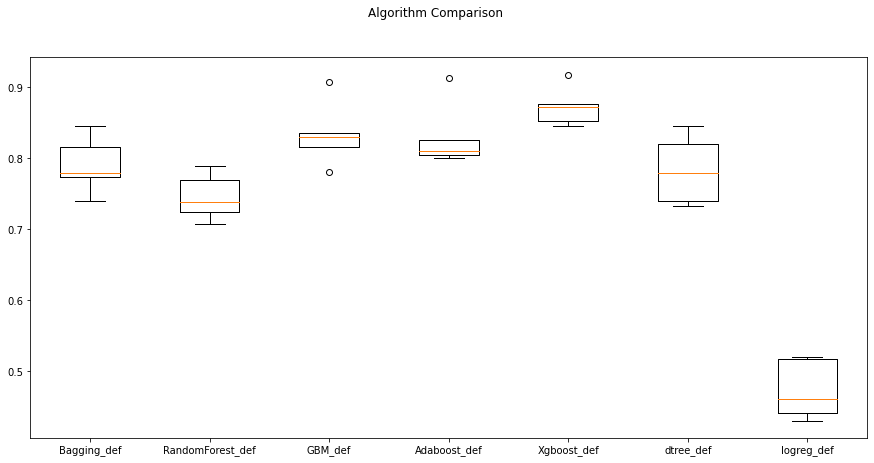

<IPython.core.display.Javascript object>

In [89]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(15, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

##### Observations
1. The XGBoost model with default parameters has the best mean recall score, whereas the logistic regression model has performed very poorly. 
2. The GradientBoosting and AdaBoost models also show promise. 
3. Bagging model performed extremely well in training, but did not show the same flair in validation models

#### II. Oversampling models

Before we proceed further, let's once again check the value counts of the target variable in each set

In [90]:
# Checking class balance for whole data, train set, validation set, and test set

print("Target value ratio in y")
print(y.value_counts())
print("*" * 80)

print("Target value ratio in y_train")
print(y_train.value_counts())
print("*" * 80)

print("Target value ratio in y_val")
print(y_val.value_counts())
print("*" * 80)

print("Target value ratio in y_test")
print(y_test.value_counts())
print("*" * 80)

Target value ratio in y
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
********************************************************************************
Target value ratio in y_train
0    5099
1     976
Name: Attrition_Flag, dtype: int64
********************************************************************************
Target value ratio in y_val
0    1700
1     326
Name: Attrition_Flag, dtype: int64
********************************************************************************
Target value ratio in y_test
0    1701
1     325
Name: Attrition_Flag, dtype: int64
********************************************************************************


<IPython.core.display.Javascript object>

We have maintained the class proportions in each dataset as it was in the original dataset.

Let's use SMOTE techniques to create oversampled dataset. We will try to oversample the underrepresented class (1) by 40% (i.e., sampling_strategy=0.4).

Oversampling is only applied on the train dataset and not on others. 

In [91]:
# Fit SMOTE on train data(Synthetic Minority Oversampling Technique)
sm = SMOTE(sampling_strategy=0.4, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

<IPython.core.display.Javascript object>

In [92]:
# print the counts
print("Before OverSampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After OverSampling, count of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, count of label '0': {} \n".format(sum(y_train_over == 0)))

print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, count of label '1': 976
Before OverSampling, count of label '0': 5099 

After OverSampling, count of label '1': 2039
After OverSampling, count of label '0': 5099 

After OverSampling, the shape of train_X: (7138, 34)
After OverSampling, the shape of train_y: (7138,) 



<IPython.core.display.Javascript object>

We can see that the new X_train after oversampling has 40% more data in the underrepresented class.

#### Building the oversampled models

Once we build the oversampled models, we will concatenate the results into the previous dataframe that contained scores of the default models. The consolidated view of the model performances can help in better comparison.

In [93]:
models_over=[]
# Appending models_over into the list
models_over.append(("Bagging_over", BaggingClassifier(random_state=1)))
models_over.append(("RandomForest_over", RandomForestClassifier(random_state=1)))
models_over.append(("GBM_over", GradientBoostingClassifier(random_state=1)))
models_over.append(("Adaboost_over", AdaBoostClassifier(random_state=1)))
models_over.append(("Xgboost_over", XGBClassifier(random_state=1, eval_metric="logloss")))
models_over.append(("dtree_over", DecisionTreeClassifier(random_state=1)))
models_over.append(("logreg_over", LogisticRegression(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
#score = []
# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")
for name, model in models_over:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

#calculate metrics for train and validation sets for each model 
#concatenate model performance in the respective dataframe
for name, model in models_over:
    model.fit(X_train_over, y_train_over)
    score_train = model_performance_classification_sklearn(model, X_train_over, y_train_over)
    score_val = model_performance_classification_sklearn(model, X_val, y_val)
    score_val = score_val.set_index(pd.Index([name]))
    score_val_df = pd.concat([score_val_df, score_val])
    score_train = score_train.set_index(pd.Index([name]))
    score_train_df = pd.concat([score_train_df, score_train])

# print the dataframes
print ("\n")
print ("Training Performance""\n")
display (score_train_df)
print ("\n")
print ("Validation Performance""\n")
display (score_val_df)



Cross-Validation Performance:

Bagging_over: 91.36893578070048
RandomForest_over: 90.43635881871177
GBM_over: 92.79062484944838
Adaboost_over: 90.48634195693019
Xgboost_over: 95.09526906585731
dtree_over: 89.45536445536446
logreg_over: 61.01062292238764


Training Performance



Accuracy  Recall  Precision    F1
Bagging_def           0.996   0.978      0.997 0.988
RandomForest_def      1.000   1.000      1.000 1.000
GBM_def               0.978   0.905      0.957 0.930
Adaboost_def          0.961   0.850      0.903 0.876
Xgboost_def           1.000   1.000      1.000 1.000
dtree_def             1.000   1.000      1.000 1.000
logreg_def            0.881   0.402      0.738 0.520
Bagging_over          0.997   0.992      0.998 0.995
RandomForest_over     1.000   1.000      1.000 1.000
GBM_over              0.977   0.951      0.966 0.959
Adaboost_over         0.958   0.918      0.934 0.926
Xgboost_over          1.000   1.000      1.000 1.000
dtree_over            1.000   1.000      1.000 1.000
logreg_over           0.817   0.582      0.722 0.645



Validation Performance



Accuracy  Recall  Precision    F1
Bagging_def           0.952   0.776      0.913 0.839
RandomForest_def      0.940   0.687      0.918 0.786
GBM_def               0.961   0.816      0.933 0.871
Adaboost_def          0.955   0.813      0.898 0.853
Xgboost_def           0.969   0.865      0.937 0.900
dtree_def             0.932   0.755      0.812 0.782
logreg_def            0.869   0.325      0.702 0.444
Bagging_over          0.949   0.791      0.881 0.834
RandomForest_over     0.943   0.733      0.892 0.805
GBM_over              0.963   0.859      0.909 0.883
Adaboost_over         0.954   0.862      0.854 0.858
Xgboost_over          0.972   0.890      0.935 0.912
dtree_over            0.923   0.742      0.773 0.757
logreg_over           0.855   0.537      0.552 0.544

<IPython.core.display.Javascript object>

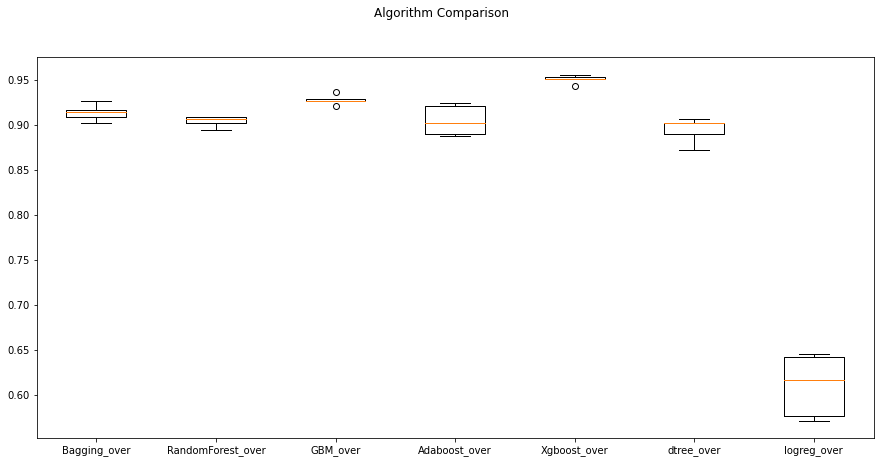

<IPython.core.display.Javascript object>

In [94]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(15, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

##### Observation
1. Once again, logistic regression models fared very poorly, and XGBoost models performed excellently in the train set. 
2. The rest of the models performed well in the train set, but only GradientBoosting and AdaBoost models performed equally well in the validation sets.

#### III. Undersampling models

We will use RandomUnderSampler with sampling_strategy=1 for this section of model building. A sampling_strategy=1 indicates the over-represented class will have equal representation as the under-represented class after undersampling.

In [95]:
# fit random under sampler on the train data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

<IPython.core.display.Javascript object>

In [96]:
# print the counts
print("Before Under Sampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before Under Sampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, count of label '1': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, count of label '0': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, count of label '1': 976
Before Under Sampling, count of label '0': 5099 

After Under Sampling, count of label '1': 976
After Under Sampling, count of label '0': 976 

After Under Sampling, the shape of train_X: (1952, 34)
After Under Sampling, the shape of train_y: (1952,) 



<IPython.core.display.Javascript object>

In [97]:
#creating an empty list to store the models
models_under=[]

# Appending models_under into the list
models_under.append(("Bagging_under", BaggingClassifier(random_state=1)))
models_under.append(("RandomForest_under", RandomForestClassifier(random_state=1)))
models_under.append(("GBM_under", GradientBoostingClassifier(random_state=1)))
models_under.append(("Adaboost_under", AdaBoostClassifier(random_state=1)))
models_under.append(("Xgboost_under", XGBClassifier(random_state=1, eval_metric="logloss")))
models_under.append(("dtree_under", DecisionTreeClassifier(random_state=1)))
models_under.append(("logreg_under", LogisticRegression(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
#score = []
# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")
for name, model in models_under:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

#calculate metrics for train and validation sets for each model 
#concatenate model performance in the respective dataframe
for name, model in models_under:
    model.fit(X_train_un, y_train_un)
    score_train = model_performance_classification_sklearn(model, X_train_un, y_train_un)
    score_val = model_performance_classification_sklearn(model, X_val, y_val)
    score_val = score_val.set_index(pd.Index([name]))
    score_val_df = pd.concat([score_val_df, score_val])
    score_train = score_train.set_index(pd.Index([name]))
    score_train_df = pd.concat([score_train_df, score_train])

# print the dataframes
print ("\n")
print ("Training Performance""\n")
display (score_train_df)
print ("\n")
print ("Validation Performance""\n")
display (score_val_df)



Cross-Validation Performance:

Bagging_under: 91.28676085818942
RandomForest_under: 91.80272108843536
GBM_under: 94.56567242281528
Adaboost_under: 92.92673992673993
Xgboost_under: 94.56671899529043
dtree_under: 90.0596546310832
logreg_under: 80.52956567242282


Training Performance



Accuracy  Recall  Precision    F1
Bagging_def            0.996   0.978      0.997 0.988
RandomForest_def       1.000   1.000      1.000 1.000
GBM_def                0.978   0.905      0.957 0.930
Adaboost_def           0.961   0.850      0.903 0.876
Xgboost_def            1.000   1.000      1.000 1.000
dtree_def              1.000   1.000      1.000 1.000
logreg_def             0.881   0.402      0.738 0.520
Bagging_over           0.997   0.992      0.998 0.995
RandomForest_over      1.000   1.000      1.000 1.000
GBM_over               0.977   0.951      0.966 0.959
Adaboost_over          0.958   0.918      0.934 0.926
Xgboost_over           1.000   1.000      1.000 1.000
dtree_over             1.000   1.000      1.000 1.000
logreg_over            0.817   0.582      0.722 0.645
Bagging_under          0.995   0.994      0.997 0.995
RandomForest_under     1.000   1.000      1.000 1.000
GBM_under              0.974   0.975      0.972 0.974
Adaboost_under         0.946   0.952      0.941 0.947
Xgboost_under          1.000   1.000      1.000 1.000
dtree_under            1.000   1.000      1.000 1.000
logreg_under           0.790   0.790      0.791 0.790



Validation Performance



Accuracy  Recall  Precision    F1
Bagging_def            0.952   0.776      0.913 0.839
RandomForest_def       0.940   0.687      0.918 0.786
GBM_def                0.961   0.816      0.933 0.871
Adaboost_def           0.955   0.813      0.898 0.853
Xgboost_def            0.969   0.865      0.937 0.900
dtree_def              0.932   0.755      0.812 0.782
logreg_def             0.869   0.325      0.702 0.444
Bagging_over           0.949   0.791      0.881 0.834
RandomForest_over      0.943   0.733      0.892 0.805
GBM_over               0.963   0.859      0.909 0.883
Adaboost_over          0.954   0.862      0.854 0.858
Xgboost_over           0.972   0.890      0.935 0.912
dtree_over             0.923   0.742      0.773 0.757
logreg_over            0.855   0.537      0.552 0.544
Bagging_under          0.931   0.871      0.743 0.802
RandomForest_under     0.939   0.899      0.765 0.827
GBM_under              0.947   0.926      0.784 0.850
Adaboost_under         0.923   0.929      0.697 0.796
Xgboost_under          0.956   0.933      0.819 0.872
dtree_under            0.909   0.890      0.662 0.759
logreg_under           0.805   0.773      0.440 0.561

<IPython.core.display.Javascript object>

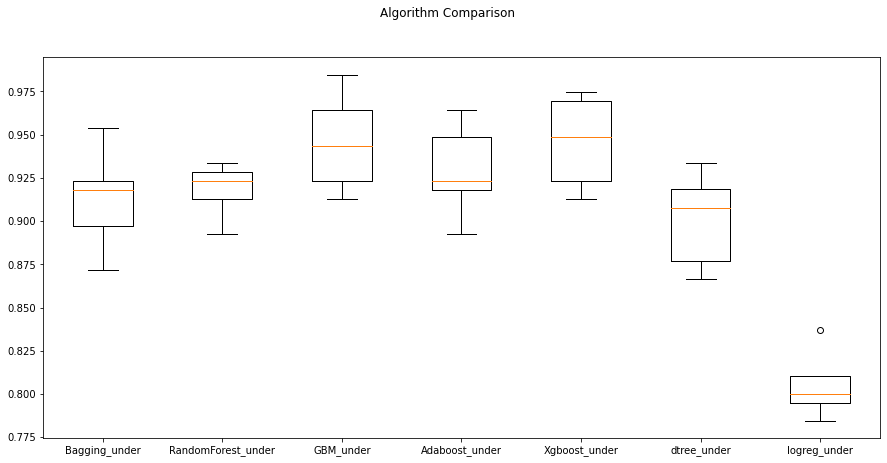

<IPython.core.display.Javascript object>

In [98]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(15, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

##### Observations
1. Logistic Regression has again performed poorly after undersampling, whereas XGBoost has performed well in both training and validation sets.
2. Bagging, AdaBoost and GradientBoosting models also show good performance in both datasets.

#### Model Evaluation
Before we go further, let's evaluate the three sets of models we have. When we evaluate, let's define a threshold for our models and select only models that exceed beyond the threshold.
- Recall greater than 90% in train and validation.
- Difference in recall between train and validation to be not more than 10%
- In order not to compromise on precision scores, also keep an eye out for a good F1 score, say above 75%.

In [99]:
# rename columns of the train dataset
score_train_df = score_train_df.rename(
    columns={
        "Accuracy": "Accuracy_train",
        "Recall": "Recall_train",
        "Precision": "Precision_train",
        "F1": "F1_train",
    }
)


# rename the columns of the val dataset
score_val_df = score_val_df.rename(
    columns={
        "Accuracy": "Accuracy_val",
        "Recall": "Recall_val",
        "Precision": "Precision_val",
        "F1": "F1_val",
    }
)

<IPython.core.display.Javascript object>

In [100]:
# concatentate train and val scores for side-by-side comparison
final_model_comp = pd.concat([score_train_df, score_val_df], axis=1)

# rearrange the columns so that similar scores are next to each other
final_model_comp = final_model_comp[
    [
        "Accuracy_train",
        "Accuracy_val",
        "Recall_train",
        "Recall_val",
        "Precision_train",
        "Precision_val",
        "F1_train",
        "F1_val",
    ]
]

# create a new column to store the difference in recall between train and val datasets
final_model_comp["RecallDiff"] = (
    final_model_comp["Recall_train"] - final_model_comp["Recall_val"]
)
# create a new column to store the difference in precision between train and val datasets
final_model_comp["PrcDiff"] = (
    final_model_comp["Precision_train"] - final_model_comp["Precision_val"]
)

# present the full dataframe
final_model_comp

Accuracy_train  Accuracy_val  Recall_train  Recall_val  \
Bagging_def                  0.996         0.952         0.978       0.776   
RandomForest_def             1.000         0.940         1.000       0.687   
GBM_def                      0.978         0.961         0.905       0.816   
Adaboost_def                 0.961         0.955         0.850       0.813   
Xgboost_def                  1.000         0.969         1.000       0.865   
dtree_def                    1.000         0.932         1.000       0.755   
logreg_def                   0.881         0.869         0.402       0.325   
Bagging_over                 0.997         0.949         0.992       0.791   
RandomForest_over            1.000         0.943         1.000       0.733   
GBM_over                     0.977         0.963         0.951       0.859   
Adaboost_over                0.958         0.954         0.918       0.862   
Xgboost_over                 1.000         0.972         1.000       0.890   
dtree_over                   1.000         0.923         1.000       0.742   
logreg_over                  0.817         0.855         0.582       0.537   
Bagging_under                0.995         0.931         0.994       0.871   
RandomForest_under           1.000         0.939         1.000       0.899   
GBM_under                    0.974         0.947         0.975       0.926   
Adaboost_under               0.946         0.923         0.952       0.929   
Xgboost_under                1.000         0.956         1.000       0.933   
dtree_under                  1.000         0.909         1.000       0.890   
logreg_under                 0.790         0.805         0.790       0.773   

                    Precision_train  Precision_val  F1_train  F1_val  \
Bagging_def                   0.997          0.913     0.988   0.839   
RandomForest_def              1.000          0.918     1.000   0.786   
GBM_def                       0.957          0.933     0.930   0.871   
Adaboost_def                  0.903          0.898     0.876   0.853   
Xgboost_def                   1.000          0.937     1.000   0.900   
dtree_def                     1.000          0.812     1.000   0.782   
logreg_def                    0.738          0.702     0.520   0.444   
Bagging_over                  0.998          0.881     0.995   0.834   
RandomForest_over             1.000          0.892     1.000   0.805   
GBM_over                      0.966          0.909     0.959   0.883   
Adaboost_over                 0.934          0.854     0.926   0.858   
Xgboost_over                  1.000          0.935     1.000   0.912   
dtree_over                    1.000          0.773     1.000   0.757   
logreg_over                   0.722          0.552     0.645   0.544   
Bagging_under                 0.997          0.743     0.995   0.802   
RandomForest_under            1.000          0.765     1.000   0.827   
GBM_under                     0.972          0.784     0.974   0.850   
Adaboost_under                0.941          0.697     0.947   0.796   
Xgboost_under                 1.000          0.819     1.000   0.872   
dtree_under                   1.000          0.662     1.000   0.759   
logreg_under                  0.791          0.440     0.790   0.561   

                    RecallDiff  PrcDiff  
Bagging_def              0.202    0.084  
RandomForest_def         0.313    0.082  
GBM_def                  0.089    0.023  
Adaboost_def             0.038    0.005  
Xgboost_def              0.135    0.063  
dtree_def                0.245    0.188  
logreg_def               0.076    0.036  
Bagging_over             0.201    0.117  
RandomForest_over        0.267    0.108  
GBM_over                 0.093    0.057  
Adaboost_over            0.056    0.080  
Xgboost_over             0.110    0.065  
dtree_over               0.258    0.227  
logreg_over              0.045    0.170  
Bagging_under            0.123    0.253  
RandomForest_under       0.101    0.235  
GBM_

<IPython.core.display.Javascript object>

In [101]:
# extract the rows where recall in training and val is greater than 90%
# extract rows where recall difference is less than 10%
# F1 scores greater than 75%
# sort by least difference between training recall and validation recall
final_model_comp[
    (final_model_comp["Recall_train"] > 0.89)
    & (final_model_comp["Recall_val"] > 0.89)
    & (final_model_comp["RecallDiff"] > 0)
    & (final_model_comp["RecallDiff"] < 0.1)
    & (final_model_comp["F1_val"] > 0.75)
].sort_values("RecallDiff", ascending=True)

Accuracy_train  Accuracy_val  Recall_train  Recall_val  \
Adaboost_under           0.946         0.923         0.952       0.929   
GBM_under                0.974         0.947         0.975       0.926   
Xgboost_under            1.000         0.956         1.000       0.933   

                Precision_train  Precision_val  F1_train  F1_val  RecallDiff  \
Adaboost_under            0.941          0.697     0.947   0.796       0.022   
GBM_under                 0.972          0.784     0.974   0.850       0.049   
Xgboost_under             1.000          0.819     1.000   0.872       0.067   

                PrcDiff  
Adaboost_under    0.245  
GBM_under         0.188  
Xgboost_under     0.181

<IPython.core.display.Javascript object>

##### Observations
1. The best models we have in this exercise are Adaboost undersampled, XGBoost undersampled and gradient boost undersampled models. 
2. These models fit/exceed the threshold we have defined for the purpose of this excercise.

#### IV. Hyperparameter Tuning using RandomizedSearchCV

Let's begin tuning our top best models using RandomizedSearchCV

In [102]:
# create an empty Dataframe to store scores of all models
tuned_score_train = pd.DataFrame()
tuned_score_val = pd.DataFrame()
# rename index of the final dataframe
tuned_score_train.index.name = "Model"
tuned_score_val.index.name = "Model"

<IPython.core.display.Javascript object>

#### IVa. Tuning AdaBoost Classifier with Undersampled data

In [103]:
# define the model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
parameters = {
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1,),
        DecisionTreeClassifier(max_depth=2, random_state=1,),
        DecisionTreeClassifier(max_depth=3, random_state=1,),
    ],
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": np.arange(0.1, 2, 0.1),
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=parameters,
    n_iter=20,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'n_estimators': 40, 'learning_rate': 0.5, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9477498691784406:


<IPython.core.display.Javascript object>

In [104]:
# fitting the model with best parameters from random search
abc_un_tuned = AdaBoostClassifier(
    random_state=1,
    n_estimators=40,
    learning_rate=0.5,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)
abc_un_tuned.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.5, n_estimators=40, random_state=1)

<IPython.core.display.Javascript object>

In [105]:
# performance metrics for undersampled training dataset
abc_un_tuned_train_model = model_performance_classification_sklearn(
    abc_un_tuned, X_train_un, y_train_un
).rename(
    index={0: "ABCun_Tuned"},
    columns={
        "Accuracy": "Accuracy_train",
        "Recall": "Recall_train",
        "Precision": "Precision_train",
        "F1": "F1_train",
    },
)
abc_un_tuned_train_model

Accuracy_train  Recall_train  Precision_train  F1_train
ABCun_Tuned           1.000         1.000            1.000     1.000

<IPython.core.display.Javascript object>

In [106]:
# concatenating the score to the consolidated score dataframe
tuned_score_train = pd.concat([tuned_score_train, abc_un_tuned_train_model])
tuned_score_train

Accuracy_train  Recall_train  Precision_train  F1_train
ABCun_Tuned           1.000         1.000            1.000     1.000

<IPython.core.display.Javascript object>

In [107]:
# performance metrics for validation dataset
abc_un_tuned_val_model = model_performance_classification_sklearn(
    abc_un_tuned, X_val, y_val
).rename(
    index={0: "ABCun_Tuned"},
    columns={
        "Accuracy": "Accuracy_val",
        "Recall": "Recall_val",
        "Precision": "Precision_val",
        "F1": "F1_val",
    },
)
abc_un_tuned_val_model

Accuracy_val  Recall_val  Precision_val  F1_val
ABCun_Tuned         0.937       0.945          0.737   0.828

<IPython.core.display.Javascript object>

In [108]:
# concatenating the score to the consolidated score dataframe
tuned_score_val = pd.concat([tuned_score_val, abc_un_tuned_val_model])
tuned_score_val

Accuracy_val  Recall_val  Precision_val  F1_val
ABCun_Tuned         0.937       0.945          0.737   0.828

<IPython.core.display.Javascript object>

##### Observations

1. The AdaBoost undersampled model performs extremely well in training and validation datasets, with 100% and 94% scores respectively.

#### IVb. Tuned Gradient boosting model on Undersampled data

In [109]:
# define the model initialized with Adaboost classifiers
model = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100, 150, 200, 250],
    "subsample": [0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
    "min_samples_split": [2, 4, 6, 8],
    "min_samples_leaf": [1, 2, 3, 4],
    "max_depth": [3, 4, 5, 6],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=parameters,
    n_iter=20,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'subsample': 1, 'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 0.8, 'max_depth': 4} with CV score=0.9579905808477237:


<IPython.core.display.Javascript object>

In [110]:
# fitting the data with best parameters from random search
gbm_under_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1),
    random_state=1,
    subsample=1,
    n_estimators=150,
    max_features=0.8,
    min_samples_split=2,
    min_samples_leaf=3,
    max_depth=4,
)
gbm_under_tuned.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1), max_depth=4,
                           max_features=0.8, min_samples_leaf=3,
                           n_estimators=150, random_state=1, subsample=1)

<IPython.core.display.Javascript object>

In [111]:
# performance metrics of training dataset
gbm_under_tuned_train_model = model_performance_classification_sklearn(
    gbm_under_tuned, X_train_un, y_train_un
).rename(
    index={0: "GBMunder_Tuned"},
    columns={
        "Accuracy": "Accuracy_train",
        "Recall": "Recall_train",
        "Precision": "Precision_train",
        "F1": "F1_train",
    },
)
gbm_under_tuned_train_model

Accuracy_train  Recall_train  Precision_train  F1_train
GBMunder_Tuned           1.000         1.000            1.000     1.000

<IPython.core.display.Javascript object>

In [112]:
# concatenating the scores to the final training dataframe
tuned_score_train = pd.concat([tuned_score_train, gbm_under_tuned_train_model])
tuned_score_train

Accuracy_train  Recall_train  Precision_train  F1_train
ABCun_Tuned              1.000         1.000            1.000     1.000
GBMunder_Tuned           1.000         1.000            1.000     1.000

<IPython.core.display.Javascript object>

In [113]:
# performance metrics on validation dataset
gbm_under_tuned_val_model = model_performance_classification_sklearn(
    gbm_under_tuned, X_val, y_val
).rename(
    index={0: "GBMunder_Tuned"},
    columns={
        "Accuracy": "Accuracy_val",
        "Recall": "Recall_val",
        "Precision": "Precision_val",
        "F1": "F1_val",
    },
)
gbm_under_tuned_val_model

Accuracy_val  Recall_val  Precision_val  F1_val
GBMunder_Tuned         0.960       0.939          0.834   0.883

<IPython.core.display.Javascript object>

In [114]:
# concatenating to the final validation score dataframe
tuned_score_val = pd.concat([tuned_score_val, gbm_under_tuned_val_model])
tuned_score_val

Accuracy_val  Recall_val  Precision_val  F1_val
ABCun_Tuned            0.937       0.945          0.737   0.828
GBMunder_Tuned         0.960       0.939          0.834   0.883

<IPython.core.display.Javascript object>

##### Observations
1. The Gradient Boosted model performed with 100% recall on undersampled train data and 95% on the validation set.

#### IVc. Tuned XGBoost model on Under sampled data

In [115]:
# defining Adaboost Classifiers
model = XGBClassifier(random_state=1, eval_metric="logloss")

# Parameter grid to pass in RandomizedSearchCV
parameters = {
    "n_estimators": np.arange(10, 100, 20),
    "scale_pos_weight": [0, 1, 2, 5],
    "subsample": [0.5, 0.7, 0.9, 1],
    "learning_rate": [0.01, 0.1, 0.2, 0.05],
    "gamma": [0, 1, 3],
    "colsample_bytree": [0.5, 0.7, 0.9, 1],
    "colsample_bylevel": [0.5, 0.7, 0.9, 1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=parameters,
    n_iter=20,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 5, 'n_estimators': 10, 'learning_rate': 0.05, 'gamma': 1, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.7} with CV score=0.9856514913657772:


<IPython.core.display.Javascript object>

In [116]:
xgb_under_tuned = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.9,
    scale_pos_weight=5,
    n_estimators=10,
    learning_rate=0.05,
    gamma=1,
    colsample_bytree=0.7,
    colsample_bylevel=0.7,
)
xgb_under_tuned.fit(X_train_un, y_train_un)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.7, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=1, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

<IPython.core.display.Javascript object>

In [117]:
xgb_under_tuned_train_model = model_performance_classification_sklearn(
    xgb_under_tuned, X_train_un, y_train_un
).rename(
    index={0: "XGBUnder_Tuned"},
    columns={
        "Accuracy": "Accuracy_train",
        "Recall": "Recall_train",
        "Precision": "Precision_train",
        "F1": "F1_train",
    },
)
xgb_under_tuned_train_model

Accuracy_train  Recall_train  Precision_train  F1_train
XGBUnder_Tuned           0.893         1.000            0.824     0.904

<IPython.core.display.Javascript object>

In [118]:
tuned_score_train = pd.concat([tuned_score_train, xgb_under_tuned_train_model])
tuned_score_train

Accuracy_train  Recall_train  Precision_train  F1_train
ABCun_Tuned              1.000         1.000            1.000     1.000
GBMunder_Tuned           1.000         1.000            1.000     1.000
XGBUnder_Tuned           0.893         1.000            0.824     0.904

<IPython.core.display.Javascript object>

In [119]:
xgb_under_tuned_val_model = model_performance_classification_sklearn(
    xgb_under_tuned, X_val, y_val
).rename(
    index={0: "XGBUnder_Tuned"},
    columns={
        "Accuracy": "Accuracy_val",
        "Recall": "Recall_val",
        "Precision": "Precision_val",
        "F1": "F1_val",
    },
)
xgb_under_tuned_val_model

Accuracy_val  Recall_val  Precision_val  F1_val
XGBUnder_Tuned         0.802       0.994          0.448   0.618

<IPython.core.display.Javascript object>

In [120]:
tuned_score_val = pd.concat([tuned_score_val, xgb_under_tuned_val_model])
tuned_score_val

Accuracy_val  Recall_val  Precision_val  F1_val
ABCun_Tuned            0.937       0.945          0.737   0.828
GBMunder_Tuned         0.960       0.939          0.834   0.883
XGBUnder_Tuned         0.802       0.994          0.448   0.618

<IPython.core.display.Javascript object>

#### Evaluating tuned models

In [121]:
# concatenating train and validation scores
final_tuned_model_comp = pd.concat([tuned_score_train, tuned_score_val,], axis=1,)

# re-arranging the columns to view similar scores side by side
final_tuned_model_comp = final_tuned_model_comp[
    [
        "Accuracy_train",
        "Accuracy_val",
        "Recall_train",
        "Recall_val",
        "Precision_train",
        "Precision_val",
        "F1_train",
        "F1_val",
    ]
]

# create new column to capture difference between train and validation recall scores
final_tuned_model_comp["RecallDiff"] = (
    final_tuned_model_comp["Recall_train"] - final_tuned_model_comp["Recall_val"]
)

# create new column to capture difference between train and validation precision scores
final_tuned_model_comp["PrcDiff"] = (
    final_tuned_model_comp["Precision_train"] - final_tuned_model_comp["Precision_val"]
)
final_tuned_model_comp = final_tuned_model_comp.sort_values(
    ["RecallDiff", "PrcDiff"], ascending=True
)
final_tuned_model_comp

Accuracy_train  Accuracy_val  Recall_train  Recall_val  \
XGBUnder_Tuned           0.893         0.802         1.000       0.994   
ABCun_Tuned              1.000         0.937         1.000       0.945   
GBMunder_Tuned           1.000         0.960         1.000       0.939   

                Precision_train  Precision_val  F1_train  F1_val  RecallDiff  \
XGBUnder_Tuned            0.824          0.448     0.904   0.618       0.006   
ABCun_Tuned               1.000          0.737     1.000   0.828       0.055   
GBMunder_Tuned            1.000          0.834     1.000   0.883       0.061   

                PrcDiff  
XGBUnder_Tuned    0.376  
ABCun_Tuned       0.263  
GBMunder_Tuned    0.166

<IPython.core.display.Javascript object>

##### Observations
1. The XGBoost model has shown the greatest promise w.r.t to recall scores - 100% and 99.4% in train and test respectively. However, the F1 scores and precision scores are really poor on the validation sets. 
2. The next best model is Adaboost undersampled model, with 100% and 95% in train and test respectively. The model has also not compromised on its F1 scores and precision scores by a great deal. 

We can consider **Adaboost undersampled** as our final model. 

In [122]:
# performance metrics for testidation dataset
abc_un_tuned_test_model = model_performance_classification_sklearn(
    abc_un_tuned, X_test, y_test
).rename(
    index={0: "ABCun_Tuned"},
    columns={
        "Accuracy": "Accuracy_test",
        "Recall": "Recall_test",
        "Precision": "Precision_test",
        "F1": "F1_test",
    },
)
abc_un_tuned_test_model

Accuracy_test  Recall_test  Precision_test  F1_test
ABCun_Tuned          0.942        0.957           0.749    0.841

<IPython.core.display.Javascript object>

##### Observations
The test scores are also very promising. Recall on the test dataset is 96%. 

#### GridSearchCV on the best model

As a final attempt to improve the model, we can try to perform a GridSearchCV from the best parameters we received from the random search CV. 

In [123]:
%%time 

# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV
# Best parameters are {'n_estimators': 40, 'learning_rate': 0.5, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)}
param_grid = {
    "n_estimators": np.arange(35, 45, 1),
    "learning_rate": np.arange(0.45,0.6,0.1),
    "base_estimator": [
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSearchCV
grid_cv.fit(X_train_un, y_train_un)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1), 'learning_rate': 0.55, 'n_estimators': 36} 
Score: 0.9415960230245946
CPU times: total: 641 ms
Wall time: 14.9 s


<IPython.core.display.Javascript object>

In [124]:
# fitting the gridsearch tuned model
abc_gtuned = AdaBoostClassifier(
    random_state=1,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
    learning_rate=0.55,
    n_estimators=36,
)
abc_gtuned.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.55, n_estimators=36, random_state=1)

<IPython.core.display.Javascript object>

In [125]:
# performance metrics on train set
abc_gtuned_train_model = model_performance_classification_sklearn(
    abc_gtuned, X_train, y_train
).rename(
    index={0: "ABC_Grid_Tuned"},
    columns={
        "Accuracy": "Accuracy_train",
        "Recall": "Recall_train",
        "Precision": "Precision_train",
        "F1": "F1_train",
    },
)
abc_gtuned_train_model

Accuracy_train  Recall_train  Precision_train  F1_train
ABC_Grid_Tuned           0.951         0.999            0.766     0.867

<IPython.core.display.Javascript object>

In [126]:
# performance metrics on val set
abc_gtuned_val_model = model_performance_classification_sklearn(
    abc_gtuned, X_val, y_val
).rename(
    index={0: "ABC_Grid_Tuned"},
    columns={
        "Accuracy": "Accuracy_val",
        "Recall": "Recall_val",
        "Precision": "Precision_val",
        "F1": "F1_val",
    },
)
abc_gtuned_val_model

Accuracy_val  Recall_val  Precision_val  F1_val
ABC_Grid_Tuned         0.933       0.939          0.725   0.818

<IPython.core.display.Javascript object>

In [127]:
# performance metrics of test set
abc_gtuned_test_model = model_performance_classification_sklearn(
    abc_gtuned, X_test, y_test
).rename(
    index={0: "ABC_Grid_Tuned"},
    columns={
        "Accuracy": "Accuracy_test",
        "Recall": "Recall_test",
        "Precision": "Precision_test",
        "F1": "F1_test",
    },
)
abc_gtuned_test_model

Accuracy_test  Recall_test  Precision_test  F1_test
ABC_Grid_Tuned          0.941        0.932           0.756    0.835

<IPython.core.display.Javascript object>

##### Observations
1. Tuning the model with parameters from the GridSearch CV did not improve our model at all. 

### Final Model

Since the GridSearch CV did not improve performance, we can consider the undersampled Adaboost model with parameters from RandomSearch CV as our final model. Test recall on the final model is 95%, without compromising much on the F1 score. Let's see what the important features are and plot the confusion matrix as well. 

### Feature Importance

Let's try to understand which are the most important features that the model is predicting. 

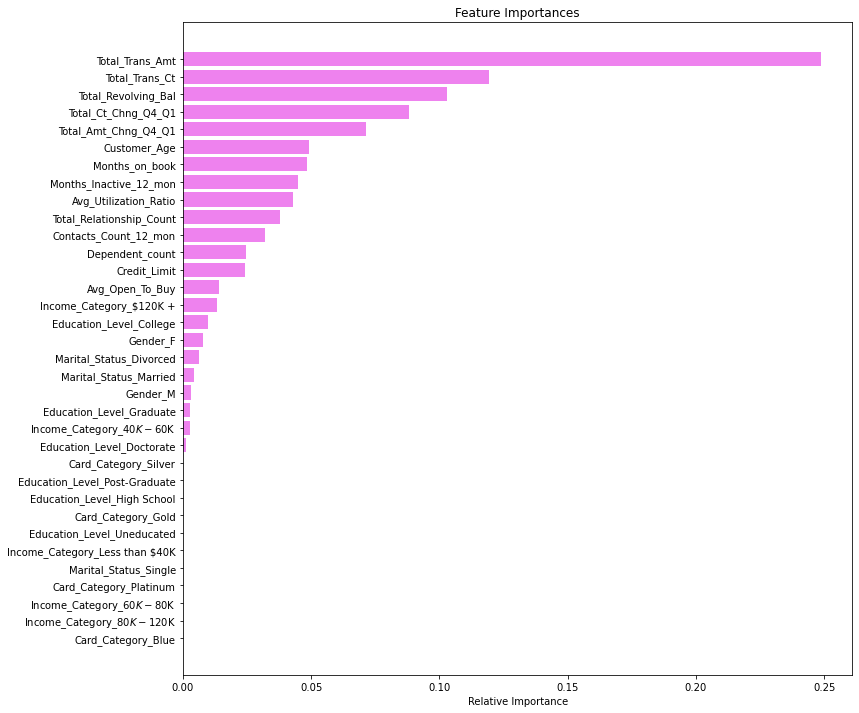

<IPython.core.display.Javascript object>

In [128]:
feature_names = X_train.columns
importances = abc_un_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

##### Observations
The most important features according to the model are: 
- Total_Trans_Amt
- Total_Trans_Ct
- Total_Revolving_Bal
- Total_Ct_Chng_Q4_Q1

This ties well with our observations from the EDA stages. 

### False Positive and Negative Analysis

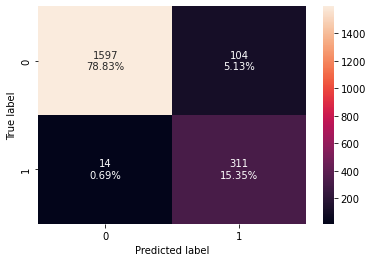

<IPython.core.display.Javascript object>

In [129]:
# plotting confusion matrix for test dataset
confusion_matrix_sklearn(abc_un_tuned, X_test, y_test)

True Positives (TP): the model correctly predicted 311 customers will attrite from the bank.

True Negatives (TN): the model correctly predicted that 1597 customers will stay with the bank.

False Positives (FP): the model incorrectly predicted that 104 customers will attrite from the bank (a "Type I error").

False Negatives (FN): the model incorrectly predicted that 14 customers will stay with the bank (a "Type II error").

### Pipelines for productionizing the model

Before creating the pipeline, we can do the following steps:
1. Split the dataset into train and test.
2. Encode the target variable. 

In order to build the pipeline, we will perform the following steps.
1. Define a function transformer to replace erroneous / unknown values in Income_Category feature to nan.
2. Define a list of numerical features and create a pipeline with  a SimpleImputer to impute missing values with the median. 
3. Define a list of categorical features and create a pipeline which first imputes missing values with most frequent values, and then perform OneHotEncoding
4. Define a ColumnTransformer to call the pipeline transformers in steps 2 & 3. 
5. Finally chaining everything together with the production pipeline, calling the transformers in the following order
- Function Transformers ( from step #1)
- Column Transformers (from step #4)
- RandomUnderSampler to undersample the data
- Adaboost Classifier with best parameters from random search CV.

In [130]:
# create a copy of the dataset
data = thera.copy()

<IPython.core.display.Javascript object>

In [131]:
# Separating target variable and other variables
X = data.drop(columns="Attrition_Flag")
Y = data["Attrition_Flag"]

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1,
)
print(X_train.shape, X_test.shape)

(7088, 20) (3039, 20)


<IPython.core.display.Javascript object>

In [132]:
# encode the target variable in train set
y_train.replace(
    to_replace={"Attrited Customer": 1, "Existing Customer": 0}, inplace=True
)

# encode the target variable in test set
y_test.replace(
    to_replace={"Attrited Customer": 1, "Existing Customer": 0}, inplace=True
)


<IPython.core.display.Javascript object>

In [133]:
# defining function to replace erroneous values with nan in features
def myProcessingSteps(df):
    # Replacing the values in Income_Category column
    df["Income_Category"].replace({"abc": np.nan}, inplace=True)

    return df

<IPython.core.display.Javascript object>

In [134]:
# The function created for processing the data should be passed as an arugument in the FunctionTransformer
processing = FunctionTransformer(myProcessingSteps)

<IPython.core.display.Javascript object>

In [135]:
# creating a list of numerical variables
numerical_features = [
    "Customer_Age",
    "Dependent_count",
    "Months_on_book",
    "Total_Relationship_Count",
    "Months_Inactive_12_mon",
    "Contacts_Count_12_mon",
    "Credit_Limit",
    "Total_Revolving_Bal",
    "Avg_Open_To_Buy",
    "Total_Amt_Chng_Q4_Q1",
    "Total_Trans_Amt",
    "Total_Trans_Ct",
    "Total_Ct_Chng_Q4_Q1",
    "Avg_Utilization_Ratio",
]

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])


<IPython.core.display.Javascript object>

In [136]:
# creating a list of categorical variables
categorical_features = [
    "Gender",
    "Education_Level",
    "Marital_Status",
    "Income_Category",
    "Card_Category",
]

# creating a transformer for categorical variables, which will first apply simple imputer and 
# then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(sparse=False, handle_unknown="ignore")),
    ]
)
# handle_unknown = "ignore", allows model to handle any unknown category in the test data


<IPython.core.display.Javascript object>

In [137]:
# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="drop",
)
# remainder = "drop" will allow variables that are present in original data 
# but not in "numerical_columns" and "categorical_columns" to be dropped, example CLIENTNUM


<IPython.core.display.Javascript object>

In [138]:
# Creating new pipeline with best parameters
prod_pipe = ImbPipeline(
    steps=[
        ("data_processing", processing),
        ("pre", preprocessor),
        ("undersample", RandomUnderSampler(random_state=1, sampling_strategy=1)),
        (
            "ABC",
            AdaBoostClassifier(
                random_state=1,
                n_estimators=40,
                learning_rate=0.5,
                base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
            ),
        ),
    ]
)
# Display Pipeline
set_config(display="diagram")

# # Fit the model on training data
prod_pipe.fit(X_train, y_train)

Pipeline(steps=[('data_processing',
                 FunctionTransformer(func=<function myProcessingSteps at 0x00000190FAB4E310>)),
                ('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Customer_Age',
                                                   'Dependent_count',
                                                   'Months_on_book',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Cre...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Gender', 'Education_Level',
                                                   'Marital_Status',
                                                   'Income_Category',
                                                   'Card_Category'])])),
                ('undersample',
                 RandomUnderSampler(random_state=1, sampling_strategy=1)),
                ('ABC',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                                          random_state=1),
                                    learning_rate=0.5, n_estimators=40,
                                    random_state=1))])

<IPython.core.display.Javascript object>

In [139]:
# calculate metrics of the production pipeline on unseen data
model_performance_classification_sklearn(prod_pipe, X_test, y_test)

Accuracy  Recall  Precision    F1
0     0.947   0.941      0.777 0.851

<IPython.core.display.Javascript object>

In [140]:
# predict on unseen data
prod_pipe.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

<IPython.core.display.Javascript object>

##### Observations

Production pipeline has been created, and the scores are similar as the ones we obtained on unseen data in model building stages.

### Summary and Conclusions

We have extensively analysed the data and built several models based on decision trees, logistic regressions and ensemble techniques. Before we make recommendations on which model to use, let us look at a summary of the work we've done.

### Summary of Data

1. The original dataset had 10127 rows and 21 columns, including the variable of interest.
2. There were 2 columns with missing values, 1 with unknown/erroneous values and no duplicated rows.
3. From the dataset, the variables can be categorized in the following manner

##### Features that can indicate customers' relationship with a bank

- Total_Relationship_Count
- Months_Inactive_12_mon
- Contacts_Count_12_mon

##### Credit  & balance related features
- Credit_Limit
- Total_Revolving_Bal
- Avg_Open_To_Buy
- Total_Trans_Amt
- Total_Trans_Ct
- Total_Ct_Chng_Q4_Q1
- Total_Amt_Chng_Q4_Q1
- Avg_Utilization_Ratio

#####  Customer profile features
- Customer_Age
- Gender
- Income_Category
- Dependent_count
- Education_Level
- Marital_Status
- Card_Category

##### Target Variable
- Attrition_Flag

### Summary of Data Treatments
1. The column, CLIENTNUM, was dropped off. 
2. There were no duplicated rows. 
3. There were erroneous values, abc, in the Income_Category column, which were replaced with nan.  
4. There were erroneous values, Education_Level and Marital_Status.
5. Missing values were imputed with most frequent values in categorical columns.
6. The following features had outliers in them:

High number of outliers
- Credit_Limit
- Avg_Open_To_Buy
- Total_Amt_Chng_Q4_Q1
- Total_Ct_Chng_Q4_Q1
- Total_Revolving_Bal
- Total_Trans_Amt
- Months_on_book 
- Months_Inactive_12_mon
- Contacts_Count_12_mon

Few outliers
- Customer_Age 
- Total_Trans_Ct
7. Outliers in Customer_Age and Total_Trans_Ct were verified and found to be real data.
8. The outliers in the remaining columns were on the higher side. However, these were still analysed with respect to other features and were found to be valid business data, and therefore, retained for modeling

### Key Observations from EDA
1. A large group of customers belong to the 40-50 age group (4652), followed by 2673 customers in 50-60 age group. Median age of the dataset is 46.
2. The dataset is almost balanced in terms of gender, with females slightly higher than males - 5358 compared to 4769.
3. Most people have 2 or 3 dependents - 2655 and 2732, respectively. This indicates most customers have a very small family to support. Customers with 5 dependents are least common - only 424.
4. Most customers in the dataset are graduates (3128) followed by high-school graduates (2013). Customers with Doctorate level of education is the least common - only 451.
5. Most customers are either married (4687) or single (3943). Very few customers are divorced (748).
6. Most customers (3561) are belong to the Less than 40K income category, followed by 1790 customers in the 40-60K category.
7. Most customers hold a Blue card, which indicates this could be the entry level card. Platinum card is held by just 20 customers, indicating this could be the premium level card.
8. The dataset is highly imbalanced in terms of the target variable - Attrition Flag. 83% of the dataset is an existing customer and only 17% belongs to attrited customers.
9. Most customers enjoy greater than 2-4 years of relationship with the bank. 5418 customers have 2-3 years of relationship and 3207 customers have 3-4 years of relationship. Only 655 customers have greater than 4 years of relationship.
10. 2305 customers hold 3 products. Customers who hold 4 or more products are almost close in number.
11. Most customers are inactive atleast 3 months in the last 12 months.
12. Most customers (3380) have contacted the bank atleast 3 times in the last 12 months. Only very few customers have contacted the bank 5 times and more. There are 399 customers who have never contacted the bank in the last 12 months.
13. Most customers (6350)have transacted atleast 50-100 times in the last 12 months with the bank.
14. The following features have strong positive correlations:
    - Months_on_book and Customer_Age
    - Total_Revolving_Bal and Avg_Utilization_Ratio
    - Total_Trans_Ct and Total_Trans_Amt
    - Avg_Open_To_Buy and Credit_Limit
15. The following features have strong negative correlations:
    - Credit_Limit and Avg_Utilization_Ratio
    - Avg_Open_To_Buy and Avg_Utilization_Ratio
16. The following numerical features have a strong influence on the Attrition_Flag:
    - Total_Revolving_Bal
    - Total_Trans_Ct
    - Total_Ct_Chng_Q4_Q1
    - Avg_Utilization_Ratio
 
### Profile of attrited customers
These are the characteristics of customers who have attrited according to the card type they hold. 

**Customer Profile**
- Blue: Females slightly outnumber males in this group. These customers belong to the 40-50 age group, have an income of less than 40K, have 2 or 3 dependents, are graduates and are mostly married,  
- Silver: Slightly more males than females, belong to the 40-60 age group, can belong to any income category or education level, have 2-4 dependents. Singles slightly outnumber married/divorced customers.
- Gold: They are Both male and female, belong to the 40-50 age group, have a wide range of incomes, have 2-3 dependents, are graduates and are mostly single.
- Platinum: Not enough data to make meaningful inferences.

**Relationship Strategy**
- Blue: They have a long relationship of 2-4 years, and have upto 6 products. Most of them contact the bank atleast 3 times in the last 12 months
- Silver: They have a relationship of 2-4 years, can have multiple products upto 6, and contact the bank atleast 2-3 times a year.
- Gold: They have a relationship of 2-3 years, multiple products and contact atleast 2-3 times a year
- Platinum: Not enough data to make meaningful inferences.

**Credit & Balance**
- Blue: Most customers have a credit limit from 1400-9700. Most customers have upto 17000 left on the card to spend. The majority spend a total of 500-3000 in a year, and make 30-50 transactions in a year. 
- Silver: Most customers have a credit limit from 25000-35000. Most customers have upto 35000 left on the card to spend. The majority make 30-100 transactions in a year. 
- Gold: Most customers have a credit limit from 25000-35000. Most customers have upto 35000 left on the card to spend. Unable to discern the number of transactions or amounts they transact in a year.
- Platinum: Not enough data to make meaningful inferences.

### Data Preparation
1. The column CLIENTNUM was dropped off since they were identifier columns and would not contribute significantly to the prediction model. 
2. Erroneous values, abc, in the Income_Category column, which were replaced with nan.
2. The data was split into train, temp and test. 
3. The following actions were taken to prevent data leakage:
- The target variable was replaced with 1 & 0 on the individual datasets. 
- Missing values were imputed separately on the different datasets
- Categorical variables were OneHotEncoded, but again separately on the different datasets
4. Since outliers were found to be significant and relevant, we will not drop these outliers so as not to lose significant data. We will also not transform these outliers since there is always the possibility that they will present themselves in production data.

### Model Evaluation Criteria

When a bank like Thera Bank is trying to contain attrition of customers, the classification model must have the potential to predict as many customers who are likely to attrite. Customer who are predicted to stay, but would actually attrite can pose a severe risk and loss to the bank. Therefore, it is imperative to reduce false negatives. For this reason, **Recall** is the metric of interest here. 

### Summary of model building

1. We have built 7 models using decision trees, logistic regression and ensemble techniques.
2. We have tried to improve these models using oversampling and undersampling techniques, resulting in 14 models.
3. Three of the most promising models were selected and tuned using Random Search CV. These were the AdaBoost Undersampled model, XGBoost Undersampled model and Adaboost Oversampled model. 
4. The Adaboost Undersampled model was considered the best out of these models.
5. This model was further tuned with tuned using Grid Search CV with the hyperparameters returned by Random Search CV, but the performance was not improved by much. 

### Recommended Model

1. The recommended model is the AdaBoost Undersampled model, since it returned 95% recall on unseen data, without compromising on the precision and F1 scores by a great deal.
2. The most important features according to the model are:
- Total_Trans_Amt
- Total_Trans_Ct
- Total_Revolving_Bal
- Total_Ct_Chng_Q4_Q1

### Production Pipeline

The pipeline was built in the following manner
- The dataset was split into train and test.
- Target variable was encoded.
- A function transformer was defined to replace erroneous / unknown values in Income_Category feature to nan.
- A pipeline with a SimpleImputer was defined to impute missing values with the median.
- A second pipeline was defined which first imputes missing values with most frequent values, and then performs OneHotEncoding
- A ColumnTransformer to call the pipeline transformers in the previous steps.
- Finally, everything was chained together with the production pipeline, calling the transformers in the following order
    - Function Transformers ( from step #1)
    - Column Transformers (from step #4)
    - RandomUnderSampler to undersample the data
    - Adaboost Classifier with best parameters from random search CV.

### Actionable Insights and Recommendations
1. We have seen the most important features that can indicate attrition. Therefore, the bank must ensure they are profiling customers according to these features and regularly monitoring them for any red flags. 
- Total_Trans_Amt (Mean of Attrited Customers: 3095 | Mean for Existing Customers: 4654)
- Total_Revolving_Bal (Mean of Attrited Customers: 672 | Mean for Existing Customers: 1256)
- Total_Trans_Ct (Mean of Attrited Customers: 44 | Mean for Existing Customers: 68)
- Total_Ct_Chng_Q4_Q1 (Mean of Attrited Customers: 0.554 | Mean for Existing Customers: 0.742)
- Avg_Utilization_Ratio (Mean of Attrited Customers: 0.162 | Mean for Existing Customers: 0.296)

2. Most customers belong to a middle-aged, low income category and usually have very few dependents. Therefore, the products, credit limits must be designed in order to attract these customers. 
3. Loyalty programs are becoming quite the trend now, even among banks. Thera bank could consider engaging their existing customers through loyalty programs, one objective of which could be to improve / maintain consistent relationship with their customers. 
4. Collect well-rounded data about the customers including Occupations, City of Residence, which could help in making even more meaningful inferences. Collect more samples about Platinum cardholders which could help to study them better. 